### Phase 4 Time Series Project
### Authors:
* #### Lynn Oloo
* #### Troye Gilbert
* #### Josephine Maro
* #### Edmund Nyaribo


## DREAM HOUSE INTERNATIONAL: TOP 5 ZIP CODES FOR MAXIMUM ROI
### Problem Statement
Dream House International, a consultancy and real estate firm, has been approached by a client seeking to invest in properties with the aim of achieving the highest possible Return on Investment (ROI). The client requires our expertise to identify the top 5 zip codes that offer the best potential for ROI. Given the complexity of this task, we are dedicated to delivering a comprehensive, data-driven analysis. To accomplish this, we will leverage the extensive historical real estate data from Zillow. By examining trends, property values, and other critical metrics, our goal is to provide precise and insightful recommendations to optimize the client's investment outcomes.

### Objectives
Determine the top 5 zip codes that promise the highest ROI for our client.
Develop a time series regression model to forecast the most profitable zip codes.
Analyze the dataset and model to assess the real estate market's growth in relation to property sales values.
Identify the 5 zip codes that should be avoided to prevent potential losses.
### Challenges
Data Ambiguity and Variability: Real-world data may contain ambiguities and unpredictability, leading to potential inaccuracies in our analysis and predictions.
Evolving Market Conditions: The real estate market is subject to changes due to economic shifts, policy alterations, and unforeseen events like natural disasters or pandemics. These fluctuations can impact market conditions swiftly, making historical data less reliable for future forecasts.
### Solutions
Employ rigorous data cleaning and preprocessing techniques to address missing values, outliers, and inconsistencies. Utilize advanced statistical and machine learning methods to handle noisy data and improve prediction accuracy.
Incorporate real-time data sources and economic indicators into the analysis to reflect current market conditions. Use adaptive models capable of updating predictions based on the latest data.

## Data Preparation/Preprocessing

### Importing libraries

In [1]:
import pandas as pd
import numpy as np


# Visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import time 

import calendar

import warnings
warnings.filterwarnings('ignore')

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX


from sklearn.metrics import mean_squared_error

### Loading datasets

In [2]:
# loading data

df = pd.read_csv('./time-series/zillow_data.csv')
df.head(20)

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
5,91733,77084,Houston,TX,Houston,Harris,6,95000.0,95200.0,95400.0,...,157900,158700,160200,161900,162800,162800,162800,162900,163500,164300
6,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,...,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500


### checking the shape

In [3]:
shape = df.shape
print("Ther shape of the data is:",shape)

Ther shape of the data is: (14723, 272)


In [4]:
df.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
count,14723.000000,14723.000000,14723.000000,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,1.368400e+04,...,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04,1.472300e+04
mean,81075.010052,48222.348706,7362.000000,1.182991e+05,1.184190e+05,1.185374e+05,1.186531e+05,1.187803e+05,1.189275e+05,1.191205e+05,...,2.733354e+05,2.748658e+05,2.764646e+05,2.780332e+05,2.795209e+05,2.810953e+05,2.826571e+05,2.843687e+05,2.865114e+05,2.880399e+05
std,31934.118525,29359.325439,4250.308342,8.600251e+04,8.615567e+04,8.630923e+04,8.646795e+04,8.665094e+04,8.687208e+04,8.715185e+04,...,3.603984e+05,3.614678e+05,3.627563e+05,3.644610e+05,3.656003e+05,3.670454e+05,3.695727e+05,3.717739e+05,3.724612e+05,3.720544e+05
min,58196.000000,1001.000000,1.000000,1.130000e+04,1.150000e+04,1.160000e+04,1.180000e+04,1.180000e+04,1.200000e+04,1.210000e+04,...,1.440000e+04,1.450000e+04,1.470000e+04,1.480000e+04,1.450000e+04,1.430000e+04,1.410000e+04,1.390000e+04,1.380000e+04,1.380000e+04
25%,67174.500000,22101.500000,3681.500000,6.880000e+04,6.890000e+04,6.910000e+04,6.920000e+04,6.937500e+04,6.950000e+04,6.960000e+04,...,1.269000e+05,1.275000e+05,1.282000e+05,1.287000e+05,1.292500e+05,1.299000e+05,1.306000e+05,1.310500e+05,1.319500e+05,1.324000e+05
50%,78007.000000,46106.000000,7362.000000,9.950000e+04,9.950000e+04,9.970000e+04,9.970000e+04,9.980000e+04,9.990000e+04,9.995000e+04,...,1.884000e+05,1.896000e+05,1.905000e+05,1.914000e+05,1.925000e+05,1.934000e+05,1.941000e+05,1.950000e+05,1.967000e+05,1.981000e+05
75%,90920.500000,75205.500000,11042.500000,1.432000e+05,1.433000e+05,1.432250e+05,1.432250e+05,1.435000e+05,1.437000e+05,1.439000e+05,...,3.050000e+05,3.066500e+05,3.085000e+05,3.098000e+05,3.117000e+05,3.134000e+05,3.151000e+05,3.168500e+05,3.188500e+05,3.211000e+05
max,753844.000000,99901.000000,14723.000000,3.676700e+06,3.704200e+06,3.729600e+06,3.754600e+06,3.781800e+06,3.813500e+06,3.849600e+06,...,1.888990e+07,1.870350e+07,1.860530e+07,1.856940e+07,1.842880e+07,1.830710e+07,1.836590e+07,1.853040e+07,1.833770e+07,1.789490e+07


### checking for duplicates and missing data

In [5]:
# Checking for duplicates and missing data in the dataset
def cleaning(data):
    "This is a simple function to get missing and duplicated values"
    missing = data.isna().sum().sum()
    duplicated = data.duplicated().sum()
    return (f"There are '{missing}' missing values and '{duplicated}' duplicated values in the dataset")

cleaning(df)

"There are '157934' missing values and '0' duplicated values in the dataset"

### Summarizing Data Types

In [6]:
def summarize_data_types(df):
    """
    Create a summary DataFrame showing data types, unique value counts, and sample counts for each feature.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame for which to summarize data types and statistics.
    
    Returns:
    - pd.DataFrame: Summary DataFrame with columns for Feature, Dtypes, and Sample_Unique.
    """
    data_types = []
    for col in df.columns:
        data_types.append({
            'Feature': col,
            'Dtypes': df[col].dtype,
            'Sample_Unique': df[col].nunique()
        })
    
    summary_df = pd.DataFrame(data_types)
    return summary_df

# Get summary of data types and unique values
summary_df = summarize_data_types(df)
print(summary_df)


        Feature  Dtypes  Sample_Unique
0      RegionID   int64          14723
1    RegionName   int64          14723
2          City  object           7554
3         State  object             51
4         Metro  object            701
..          ...     ...            ...
267     2017-12   int64           5248
268     2018-01   int64           5276
269     2018-02   int64           5303
270     2018-03   int64           5332
271     2018-04   int64           5310

[272 rows x 3 columns]


### Calculating Percentage of Missing Values

In [7]:
def missing_values_percentage(df):
    # Calculating the total number of missing values in the DataFrame
    total_missing = df.isnull().sum().sum()

    # Checking the total number of cells in the DataFrame
    total_cells = df.size

    # Calculating the percentage of missing values
    percentage_missing = (total_missing / total_cells) * 100
    
    return percentage_missing

# Assuming df is your DataFrame
percentage_missing = missing_values_percentage(df)

# Rounding off the percentage to 2 decimal places
rounded_percentage_missing = round(percentage_missing, 2)

print(f"Percentage of missing values: {rounded_percentage_missing}%")

Percentage of missing values: 3.94%


### Top 10 Missing Value Percentages

In [8]:
def print_top_10_missing_value_percentages(df):
    """
    Calculate and print the percentage of missing values for each column in a DataFrame,
    sorted in descending order of missing percentages. Only the top 10 columns are shown.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame for which to calculate missing value percentages.
    
    Returns:
    - None: Prints the column names and their corresponding missing value percentages.
    """
    # Calculate the percentage of missing values for each column
    missing_values = df.isnull().mean() * 100
    
    # Sort missing values in descending order
    missing_values_sorted = missing_values.sort_values(ascending=False)
    
    # Print the top 10 columns with the highest missing percentages
    print("Top 10 Columns with Highest Missing Value Percentages:")
    for column in missing_values_sorted.index[:10]:
        print(f"{column}: {missing_values_sorted[column]:.2f}%")

# Print top 10 missing value percentages
print_top_10_missing_value_percentages(df)


Top 10 Columns with Highest Missing Value Percentages:
Metro: 7.08%
1997-04: 7.06%
1996-08: 7.06%
1997-06: 7.06%
1997-05: 7.06%
1997-03: 7.06%
1997-02: 7.06%
1997-01: 7.06%
1996-11: 7.06%
1996-10: 7.06%


### Handling Missing Data

In [9]:
# Filling the 'Metro' column with the word 'missing'
df['Metro'].fillna('missing', inplace=True)

df = df[7:].fillna(method='bfill', axis=1)

# Calculating the percentage of missing values for each column in the DataFrame
missing_values = df.isnull().mean() * 100

# Handling the date columns' missing values
df.dropna(inplace=True)

# Print the list of columns in the DataFrame along with their missing percentages
for column, percentage in missing_values.items():
    print(f"{column}: {percentage}%")

RegionID: 0.0%
RegionName: 0.0%
City: 0.0%
State: 0.0%
Metro: 0.0%
CountyName: 0.0%
SizeRank: 0.0%
1996-04: 0.0%
1996-05: 0.0%
1996-06: 0.0%
1996-07: 0.0%
1996-08: 0.0%
1996-09: 0.0%
1996-10: 0.0%
1996-11: 0.0%
1996-12: 0.0%
1997-01: 0.0%
1997-02: 0.0%
1997-03: 0.0%
1997-04: 0.0%
1997-05: 0.0%
1997-06: 0.0%
1997-07: 0.0%
1997-08: 0.0%
1997-09: 0.0%
1997-10: 0.0%
1997-11: 0.0%
1997-12: 0.0%
1998-01: 0.0%
1998-02: 0.0%
1998-03: 0.0%
1998-04: 0.0%
1998-05: 0.0%
1998-06: 0.0%
1998-07: 0.0%
1998-08: 0.0%
1998-09: 0.0%
1998-10: 0.0%
1998-11: 0.0%
1998-12: 0.0%
1999-01: 0.0%
1999-02: 0.0%
1999-03: 0.0%
1999-04: 0.0%
1999-05: 0.0%
1999-06: 0.0%
1999-07: 0.0%
1999-08: 0.0%
1999-09: 0.0%
1999-10: 0.0%
1999-11: 0.0%
1999-12: 0.0%
2000-01: 0.0%
2000-02: 0.0%
2000-03: 0.0%
2000-04: 0.0%
2000-05: 0.0%
2000-06: 0.0%
2000-07: 0.0%
2000-08: 0.0%
2000-09: 0.0%
2000-10: 0.0%
2000-11: 0.0%
2000-12: 0.0%
2001-01: 0.0%
2001-02: 0.0%
2001-03: 0.0%
2001-04: 0.0%
2001-05: 0.0%
2001-06: 0.0%
2001-07: 0.0%
2001-

### DataFrame Processing 

In [10]:
def rename_column(df, old_name, new_name):
    """
    Rename a column in a DataFrame.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the column to be renamed.
    - old_name (str): The current name of the column.
    - new_name (str): The new name to assign to the column.
    
    Returns:
    - pd.DataFrame: The DataFrame with the renamed column.
    """
    df.rename(columns={old_name: new_name}, inplace=True)
    return df

# Rename 'RegionName' to 'ZipCode' in the DataFrame 'df'
df = rename_column(df, 'RegionName', 'ZipCode')


In [11]:
df

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
11,71831,32162,The Villages,FL,The Villages,Sumter,12,101000.0,100700.0,100400.0,...,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


### Converting Zip Code to String and Padding

In [12]:
# Converted Zipcode column values to string
df.ZipCode = df.ZipCode.astype('string')
max_value = df['ZipCode'].max()
max_value

'99901'

In [13]:
# Fill the 'ZipCode' column with leading zeros to make it a 5-digit string.
df['ZipCode'] = df['ZipCode'].str.zfill(5)
df

,RegionID,ZipCode,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
7,84640,60640,Chicago,IL,Chicago,Cook,8,216500.0,216700.0,216900.0,...,798000,787100,776100,774900,777900,777900,778500,780500,782800,782800
8,91940,77449,Katy,TX,Houston,Harris,9,95400.0,95600.0,95800.0,...,166800,167400,168400,169600,170900,172300,173300,174200,175400,176200
9,97564,94109,San Francisco,CA,San Francisco,San Francisco,10,766000.0,771100.0,776500.0,...,3767700,3763900,3775000,3799700,3793900,3778700,3770800,3763100,3779800,3813500
10,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,...,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200
11,71831,32162,The Villages,FL,The Villages,Sumter,12,101000.0,100700.0,100400.0,...,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,01338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,03293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,missing,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


### Calculating ROI, Standard Deviation, and CV

In [14]:
# Calculating and creating a new column - ROI
df['ROI'] = (df['2017-04'] / df['1996-04']) - 1

# Calculating standard deviation (std) to be used for CV
df["std"] = df.loc[:, "1996-04":"2017-04"].std(skipna=True, axis=1)

# Calculating mean to be used for CV
df["mean"] = df.loc[:, "1996-04":"2017-04"].mean(skipna=True, axis=1)

# Calculating and creating a new column - CV
df["CV"] = df['std'] / df["mean"]

# Dropping std and mean columns as they are not necessary for analysis
df.drop(["std", "mean"], inplace=True, axis=1)

In [15]:
# Created a new copy of the dataset
melted_df = df.copy()

### Melting DataFrame

In [16]:
# Defined a function to melt and process the DataFrame

def melt_data(df):
    # Melt the DataFrame 'df' into a long format
    melted = pd.melt(df, id_vars=['ZipCode', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName', 'ROI', 'CV'], var_name='time')
    
    # Converted the 'time' column to datetime format
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    
    # Dropped rows with missing values in the 'value' column
    melted = melted.dropna(subset=['value'])
    
    return melted

melted_df = melt_data(melted_df)
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
0,60640,84640,8,Chicago,IL,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0
1,77449,91940,9,Katy,TX,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0
2,94109,97564,10,San Francisco,CA,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0
3,11226,62037,11,New York,NY,New York,Kings,4.38642,0.431858,1996-04-01,162000.0
4,32162,71831,12,The Villages,FL,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0
...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,MA,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300
3899736,03293,59107,14720,Woodstock,NH,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800
3899737,40404,75672,14721,Berea,KY,Richmond,Madison,1.115587,0.176079,2018-04-01,133400
3899738,81225,93733,14722,Mount Crested Butte,CO,missing,Gunnison,2.100471,0.279729,2018-04-01,664400


### Mapping State Abbreviations

In [17]:
# Mapping the states 
state_map = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

melted_df['State'] = melted_df['State'].map(state_map)
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value
0,60640,84640,8,Chicago,Illinois,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0
3,11226,62037,11,New York,New York,New York,Kings,4.38642,0.431858,1996-04-01,162000.0
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0
...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,Massachusetts,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300
3899736,03293,59107,14720,Woodstock,New Hampshire,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800
3899737,40404,75672,14721,Berea,Kentucky,Richmond,Madison,1.115587,0.176079,2018-04-01,133400
3899738,81225,93733,14722,Mount Crested Butte,Colorado,missing,Gunnison,2.100471,0.279729,2018-04-01,664400


### Adding Month and Year Columns

In [18]:
# Create new columns for month and year
melted_df['month'] = melted_df['time'].dt.month
melted_df['year'] = melted_df['time'].dt.year
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
0,60640,84640,8,Chicago,Illinois,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0,4,1996
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0,4,1996
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0,4,1996
3,11226,62037,11,New York,New York,New York,Kings,4.38642,0.431858,1996-04-01,162000.0,4,1996
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0,4,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,Massachusetts,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300,4,2018
3899736,03293,59107,14720,Woodstock,New Hampshire,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800,4,2018
3899737,40404,75672,14721,Berea,Kentucky,Richmond,Madison,1.115587,0.176079,2018-04-01,133400,4,2018
3899738,81225,93733,14722,Mount Crested Butte,Colorado,missing,Gunnison,2.100471,0.279729,2018-04-01,664400,4,2018


### Converting Month Numbers to Names


In [19]:
# Example mapping of month numbers to month names
month_map = {i: calendar.month_name[i] for i in range(1, 13)}

melted_df['month'] = melted_df['month'].map(month_map)
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
0,60640,84640,8,Chicago,Illinois,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0,April,1996
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0,April,1996
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0,April,1996
3,11226,62037,11,New York,New York,New York,Kings,4.38642,0.431858,1996-04-01,162000.0,April,1996
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,Massachusetts,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300,April,2018
3899736,03293,59107,14720,Woodstock,New Hampshire,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800,April,2018
3899737,40404,75672,14721,Berea,Kentucky,Richmond,Madison,1.115587,0.176079,2018-04-01,133400,April,2018
3899738,81225,93733,14722,Mount Crested Butte,Colorado,missing,Gunnison,2.100471,0.279729,2018-04-01,664400,April,2018


## Plotting Functions


### Plot Monthly Time Series

In [20]:
# Selected columns 'value' and 'time' from the 'melted_df' DataFrame
ts = melted_df[['value', 'time']]

# Converted the 'time' column to a datetime data type
ts['time'] = pd.to_datetime(ts['time'])

# Set the 'time' column as the index of the 'ts' DataFrame
ts.set_index('time', inplace=True)
ts

,value
time,
1996-04-01,216500.0
1996-04-01,95400.0
1996-04-01,766000.0
1996-04-01,162000.0
1996-04-01,101000.0
...,...
2018-04-01,209300
2018-04-01,225800
2018-04-01,133400


In [21]:
ts['value'] = ts['value'].astype('float')

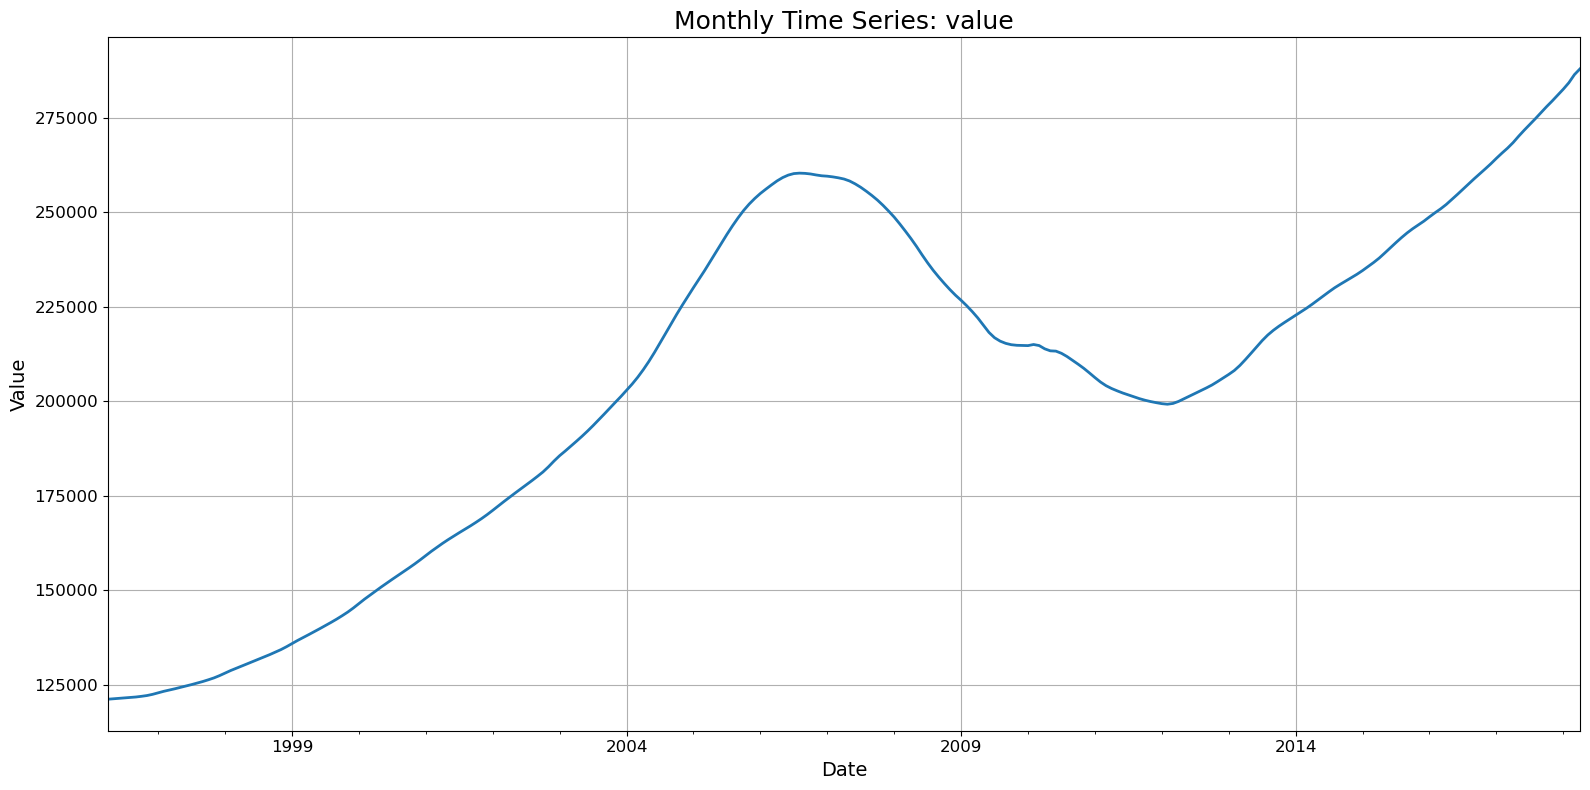

In [22]:
def plot_monthly_time_series(data, col):
    """
    Plot monthly time series data for a specified column.

    Parameters:
    - data (DataFrame): The input DataFrame containing time series data.
    - col (str): The column name to plot.

    Returns:
    - None (plots the data directly).
    """
    # Resample the data to get the monthly mean and select the specified column
    time_series_monthly_value = data.resample('MS')[col].mean()
    
    # Plotting parameters
    plt.figure(figsize=(16, 8))
    time_series_monthly_value.plot(linewidth=2)
    
    # Set plot title and labels
    plt.title(f'Monthly Time Series: {col}', fontsize=18)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    
    # Set tick parameters
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Display the plot
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_monthly_time_series(ts, 'value')


In [23]:
melted_df['value'] = melted_df['value'].astype('float')

### Plot Overall Trend

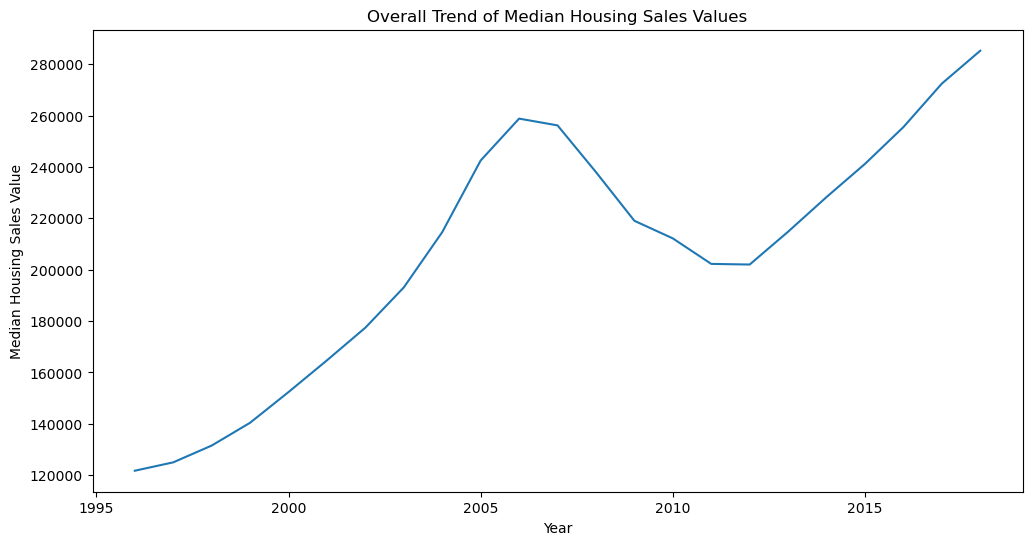

In [24]:
# Visual of overall trends

def plot_overall_trend(df, x_col, y_col, title, xlabel, ylabel, figsize=(12, 6)):
    """
    Plot the overall trend of a numerical column grouped by a datetime column (year).
    Returns:
    - None: Displays the plot.
    """
    plt.figure(figsize=figsize)
    df.groupby(x_col)[y_col].mean().plot()
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example usage:
plot_overall_trend(melted_df, 'year', 'value', 
                   'Overall Trend of Median Housing Sales Values',
                   'Year', 'Median Housing Sales Value')


In [25]:
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
0,60640,84640,8,Chicago,Illinois,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0,April,1996
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0,April,1996
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0,April,1996
3,11226,62037,11,New York,New York,New York,Kings,4.38642,0.431858,1996-04-01,162000.0,April,1996
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,Massachusetts,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300.0,April,2018
3899736,03293,59107,14720,Woodstock,New Hampshire,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800.0,April,2018
3899737,40404,75672,14721,Berea,Kentucky,Richmond,Madison,1.115587,0.176079,2018-04-01,133400.0,April,2018
3899738,81225,93733,14722,Mount Crested Butte,Colorado,missing,Gunnison,2.100471,0.279729,2018-04-01,664400.0,April,2018


## Geographical Analysis and Time Series Modeling

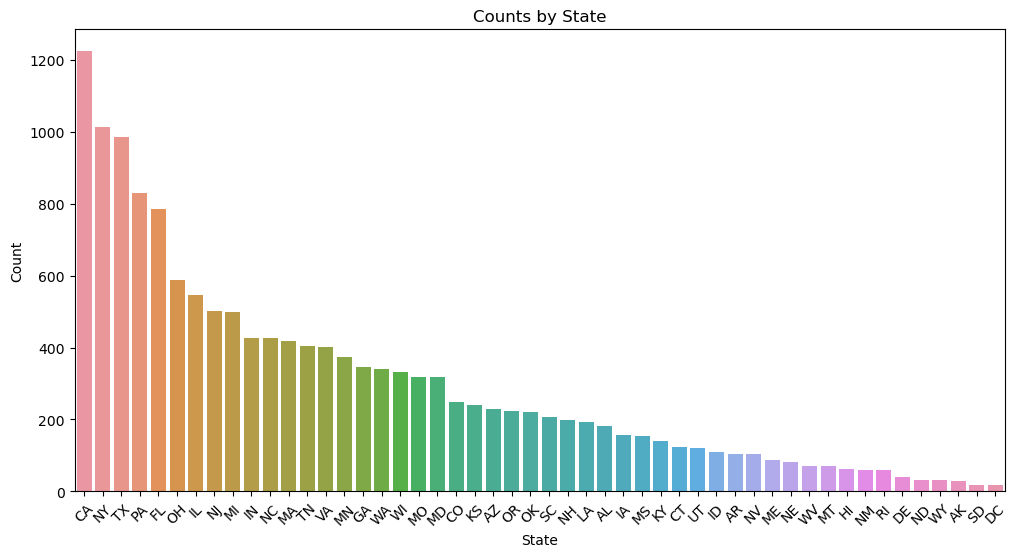

In [126]:
# Geographical analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='State', data=df, order=df.State.value_counts().index[:50])
plt.title('Counts by State')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
ca_df = melted_df[melted_df['State'] == 'California']
ca_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0,April,1996
8,90250,96107,16,Hawthorne,California,Los Angeles-Long Beach-Anaheim,Los Angeles,2.701639,0.373107,1996-04-01,152500.0,April,1996
20,94565,97771,28,Pittsburg,California,San Francisco,Contra Costa,1.743534,0.394856,1996-04-01,139200.0,April,1996
23,90046,96027,31,Los Angeles,California,Los Angeles-Long Beach-Anaheim,Los Angeles,4.284204,0.397015,1996-04-01,340600.0,April,1996
57,94501,97711,65,Alameda,California,San Francisco,Alameda,3.205036,0.334694,1996-04-01,222400.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899700,93517,97304,14684,Bridgeport,California,missing,Mono,1.349876,0.25455,2018-04-01,272500.0,April,2018
3899707,95728,98404,14691,Truckee,California,Truckee,Nevada,2.067028,0.371777,2018-04-01,496300.0,April,2018
3899709,95497,98245,14693,Annapolis,California,Santa Rosa,Sonoma,1.517253,0.308728,2018-04-01,848700.0,April,2018
3899726,92322,96805,14710,Crestline,California,Riverside,San Bernardino,1.160102,0.361669,2018-04-01,200100.0,April,2018


### Plotting the Most Popular Cities in California

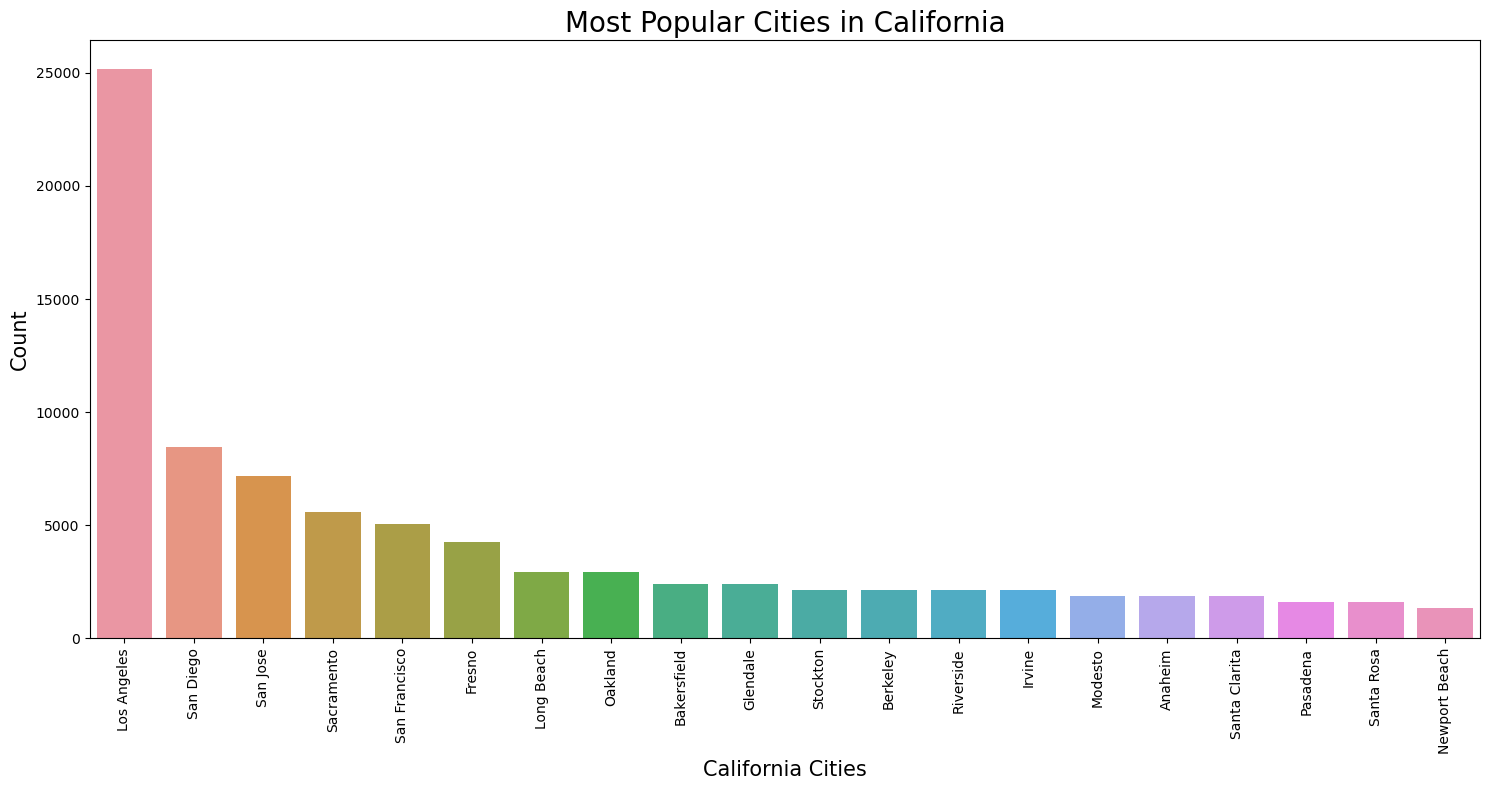

In [28]:
# plotting the most popular cities in the most popular state dataset
plt.figure(figsize=(15,8))
sns.countplot(x='City', data=ca_df, order=ca_df.City.value_counts().index[:20])
plt.xlabel("California Cities",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.title("Most Popular Cities in California",fontsize=20)
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout for better spacing
plt.show()

### Analyzing Property Value and ROI by State


In [29]:
melted_df['ROI'] = melted_df['ROI'].astype('float')

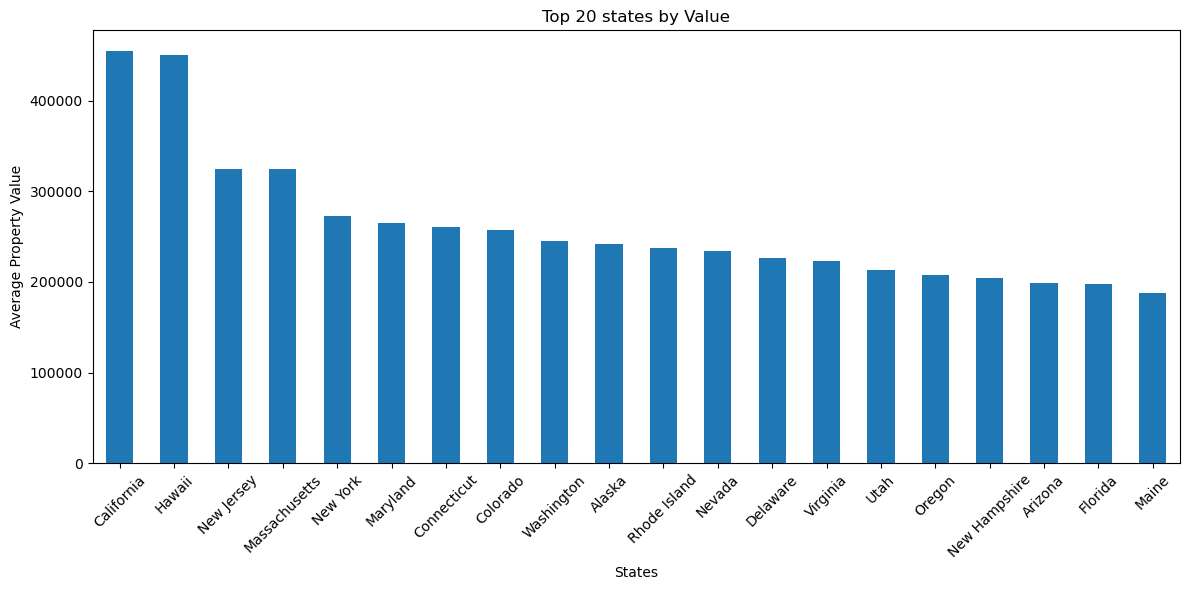

In [30]:
# Checking on top 20 cities by property value

plt.figure(figsize=(12, 6))
top_regions = melted_df.groupby('State')['value'].mean().nlargest(20)
top_regions.plot(kind='bar')
plt.title("Top 20 states by Value")
plt.xlabel("States")
plt.ylabel("Average Property Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

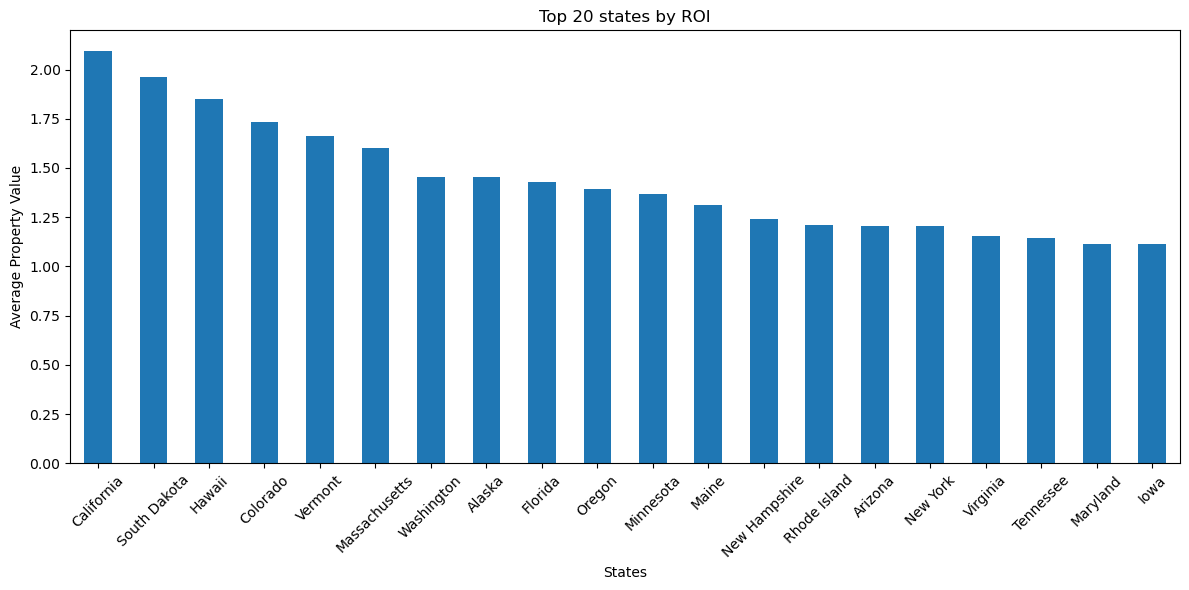

In [31]:
# Checking on top 20 cities by property value

plt.figure(figsize=(12, 6))
top_regions = melted_df.groupby('State')['ROI'].mean().nlargest(20)
top_regions.plot(kind='bar')
plt.title("Top 20 states by ROI")
plt.xlabel("States")
plt.ylabel("Average Property Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Modelling

In [32]:
melted_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
0,60640,84640,8,Chicago,Illinois,Chicago,Cook,2.587067,0.301665,1996-04-01,216500.0,April,1996
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0,April,1996
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0,April,1996
3,11226,62037,11,New York,New York,New York,Kings,4.386420,0.431858,1996-04-01,162000.0,April,1996
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899735,01338,58333,14719,Ashfield,Massachusetts,Greenfield Town,Franklin,1.235729,0.231776,2018-04-01,209300.0,April,2018
3899736,03293,59107,14720,Woodstock,New Hampshire,Claremont,Grafton,1.096009,0.306994,2018-04-01,225800.0,April,2018
3899737,40404,75672,14721,Berea,Kentucky,Richmond,Madison,1.115587,0.176079,2018-04-01,133400.0,April,2018
3899738,81225,93733,14722,Mount Crested Butte,Colorado,missing,Gunnison,2.100471,0.279729,2018-04-01,664400.0,April,2018


In [33]:
# Drop duplicates dtype = np.floatpe = np.float calculate mean for each unique date
# Drop duplicates and calculate mean
ts = melted_df.groupby('time')['value'].mean()
ts.dtype

dtype('float64')

In [34]:
ts = pd.DataFrame(ts)
ts

,value
time,
1996-04-01,121226.997825
1996-05-01,121338.033433
1996-06-01,121447.893449
1996-07-01,121555.436260
1996-08-01,121673.871976
...,...
2017-12-01,280980.803207
2018-01-01,282542.572710
2018-02-01,284254.260669


In [35]:
ts.columns

Index(['value'], dtype='object')

In [36]:
def split_train_test(ts, split_ratio=0.7):
    """
    Split a time series dataset into training and test sets.

    Parameters:
    - ts (pd.Series or pd.DataFrame): The time series data to split.
    - split_ratio (float): Ratio to split the dataset into training and test sets (default: 0.7).

    Returns:
    - tuple: Tuple containing train_set (pd.Series or pd.DataFrame) and test_set (pd.Series or pd.DataFrame).
    """
    # Ensure the data is sorted by index
    df = ts.sort_index()

    # Calculate the index to split the dataset
    split_index = int(split_ratio * len(df))

    # Split the dataset
    train_set = df.iloc[:split_index]
    test_set = df.iloc[split_index:]

    return train_set, test_set

# Split the time series into train and test sets
train_set, test_set = split_train_test(ts)

# Print the sizes of the train and test sets
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 185
Test set size: 80


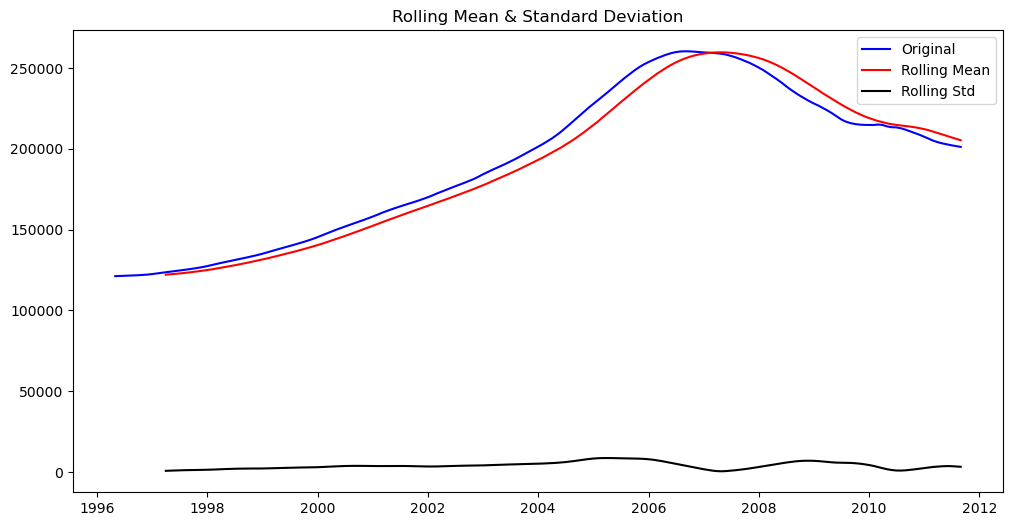

Results of Dickey-Fuller Test:
Test Statistic                  -1.913315
p-value                          0.325823
#Lags Used                      11.000000
Number of Observations Used    173.000000
Critical Value (1%)             -3.468726
Critical Value (5%)             -2.878396
Critical Value (10%)            -2.575756
dtype: float64


In [37]:
def resample_fillna(ts, freq='M'):
    """
    Resample a time series to the specified frequency and fill missing values with forward fill.
    
    Parameters:
    - ts (pd.Series): The time series data to resample.
    - freq (str): The frequency to resample to (default: 'M' for monthly).
    
    Returns:
    - pd.Series: Resampled time series with missing values filled using forward fill.
    """
    resampled_ts = ts.resample(freq).mean().fillna(method='ffill')
    return resampled_ts

def stationarity_check(ts):
    """
    Check the stationarity of a time series using the Dickey-Fuller test and rolling statistics.
    
    Parameters:
    - ts (pd.Series): The time series to check for stationarity.
    
    Returns:
    - None: Prints the Dickey-Fuller test results and plots the rolling mean and standard deviation.
    """
    # Calculate rolling statistics
    roll_mean = ts.rolling(window=12).mean()  # Rolling mean with a window size of 12 months
    roll_std = ts.rolling(window=12).std()    # Rolling standard deviation with a window size of 12 months
    
    # Perform the Dickey-Fuller test to check for stationarity
    dftest = adfuller(ts)
    
    # Plot rolling statistics
    plt.figure(figsize=(12, 6))
    plt.plot(ts, color='blue', label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test:')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput[f'Critical Value ({key})'] = value
    print(dfoutput)


# Resample and fill missing values
train_set_resampled = resample_fillna(train_set, freq='M')

# Check stationarity of resampled time series
stationarity_check(train_set_resampled)

### Decomposing Time Series

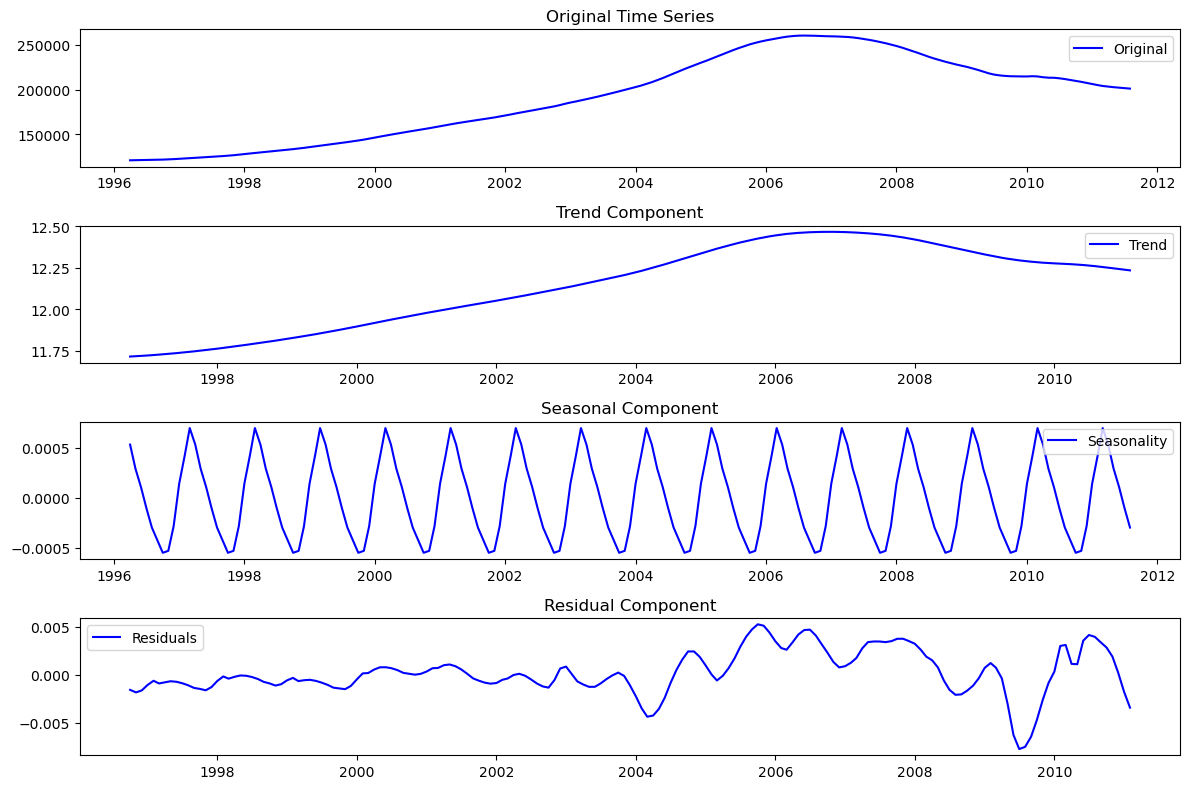

In [38]:
def decompose_and_plot(ts, freq=12):
    """
    Decompose a time series into trend, seasonality, and residuals using seasonal_decompose,
    and plot the decomposed components.
    
    Parameters:
    - ts (pd.Series or np.array): The time series data to decompose.
    - freq (int): Frequency of seasonality (default: 12 for monthly seasonality).
    
    Returns:
    - None (plots the decomposed components).
    """
    # Ensure ts is a Pandas Series
    #if not isinstance(ts, pd.Series):
        #ts = pd.Series(ts)
    
    # Convert ts to numeric if it's not already
    #ts = pd.to_numeric(ts, errors='coerce')
    
    # Drop any NaN values
    #ts = ts.dropna()
    
    # Check if there are non-positive values
    #if (ts <= 0).any():
        #raise ValueError("Time series contains non-positive values, cannot take logarithm.")
    
    # Decompose the time series using seasonal_decompose
    decomposition = seasonal_decompose(np.log(ts), period=freq)
    
    # Gather the trend, seasonality, and residuals
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    # Plot the gathered statistics
    plt.figure(figsize=(12, 8))
    
    # Original time series
    plt.subplot(411)
    plt.plot(ts.index, ts.values, label='Original', color='blue')
    plt.legend(loc='best')
    plt.title('Original Time Series')
    
    # Trend component
    plt.subplot(412)
    plt.plot(ts.index, trend, label='Trend', color='blue')
    plt.legend(loc='best')
    plt.title('Trend Component')
    
    # Seasonal component
    plt.subplot(413)
    plt.plot(ts.index, seasonal, label='Seasonality', color='blue')
    plt.legend(loc='best')
    plt.title('Seasonal Component')
    
    # Residual component
    plt.subplot(414)
    plt.plot(ts.index, residual, label='Residuals', color='blue')
    plt.legend(loc='best')
    plt.title('Residual Component')
    
    # Adjust layout for better spacing
    plt.tight_layout()
    
    # Display the plot
    plt.show()

# Example usage:
# Assuming 'train_set' is your time series data (pd.Series or np.array) after resampling and filling missing values

# Perform decomposition and plot components
decompose_and_plot(train_set)

## Creating the baseline model
Baseline model is a simple model that anyone can come up with. In time series, this is a model that proves that the current value is a true reflection of previous value.

In [39]:
ts.head()

,value
time,
1996-04-01,121226.997825
1996-05-01,121338.033433
1996-06-01,121447.893449
1996-07-01,121555.436260
1996-08-01,121673.871976


In [40]:
##Making the data stationary
ts_base = pd.concat([ts, ts.shift(1)], axis=1)
ts_base.head()

,value,value
time,,
1996-04-01,121226.997825,NaN
1996-05-01,121338.033433,121226.997825
1996-06-01,121447.893449,121338.033433
1996-07-01,121555.436260,121447.893449
1996-08-01,121673.871976,121555.436260


In [41]:
#Rename the column names
ts_base.columns = ["Actual_sales", "Forecast_sale"]
ts_base.head()

,Actual_sales,Forecast_sale
time,,
1996-04-01,121226.997825,NaN
1996-05-01,121338.033433,121226.997825
1996-06-01,121447.893449,121338.033433
1996-07-01,121555.436260,121447.893449
1996-08-01,121673.871976,121555.436260


In [42]:
#Drop any null values
ts_base.dropna(inplace = True)
ts_base.head()

,Actual_sales,Forecast_sale
time,,
1996-05-01,121338.033433,121226.997825
1996-06-01,121447.893449,121338.033433
1996-07-01,121555.436260,121447.893449
1996-08-01,121673.871976,121555.436260
1996-09-01,121811.110356,121673.871976


In [43]:
#calculating the error between actual and the forecast
ts_error = mean_squared_error(ts_base.Actual_sales, ts_base.Forecast_sale)
ts_error

1536193.450565059

In [44]:
#Getting the squareroot
np.sqrt(ts_error)

1239.4327132059484

## State 1: California

In [45]:
ca_df = melted_df[melted_df['State'] == 'California']
ca_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
2,94109,97564,10,San Francisco,California,San Francisco,San Francisco,3.853133,0.335693,1996-04-01,766000.0,April,1996
8,90250,96107,16,Hawthorne,California,Los Angeles-Long Beach-Anaheim,Los Angeles,2.701639,0.373107,1996-04-01,152500.0,April,1996
20,94565,97771,28,Pittsburg,California,San Francisco,Contra Costa,1.743534,0.394856,1996-04-01,139200.0,April,1996
23,90046,96027,31,Los Angeles,California,Los Angeles-Long Beach-Anaheim,Los Angeles,4.284204,0.397015,1996-04-01,340600.0,April,1996
57,94501,97711,65,Alameda,California,San Francisco,Alameda,3.205036,0.334694,1996-04-01,222400.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899700,93517,97304,14684,Bridgeport,California,missing,Mono,1.349876,0.25455,2018-04-01,272500.0,April,2018
3899707,95728,98404,14691,Truckee,California,Truckee,Nevada,2.067028,0.371777,2018-04-01,496300.0,April,2018
3899709,95497,98245,14693,Annapolis,California,Santa Rosa,Sonoma,1.517253,0.308728,2018-04-01,848700.0,April,2018
3899726,92322,96805,14710,Crestline,California,Riverside,San Bernardino,1.160102,0.361669,2018-04-01,200100.0,April,2018


In [46]:
new_ca_df = ca_df.groupby('time')['value'].mean()

new_ca_df = pd.DataFrame(new_ca_df)
new_ca_df

,value
time,
1996-04-01,203182.598039
1996-05-01,203089.297386
1996-06-01,203003.022876
1996-07-01,202934.722222
1996-08-01,202928.104575
...,...
2017-12-01,723263.480392
2018-01-01,729496.405229
2018-02-01,735525.980392


In [47]:
# Drop duplicates and calculate mean for each unique date
new_ca_df = new_ca_df.groupby('time').mean()
new_ca_df.head(40)

,value
time,
1996-04-01,203182.598039
1996-05-01,203089.297386
1996-06-01,203003.022876
1996-07-01,202934.722222
1996-08-01,202928.104575
1996-09-01,203004.656863
1996-10-01,203237.009804
1996-11-01,203592.238562
1996-12-01,204239.297386


In [48]:
new_ca_df.describe()

,value
count,265.000000
mean,454968.598163
std,147609.708724
min,202928.104575
25%,339729.493464
50%,444520.751634
75%,583394.035948
max,746329.084967


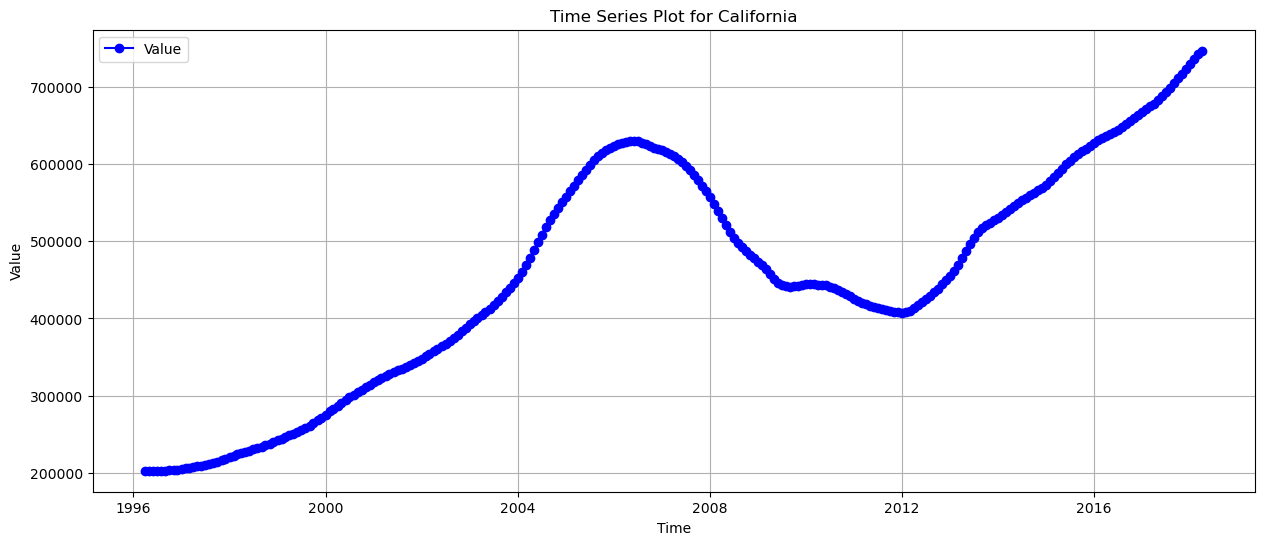

In [49]:
# Plotting the 'value' column
plt.figure(figsize=(15, 6))
plt.plot(new_ca_df['value'], marker='o', linestyle='-', color='b', label='Value')
plt.title('Time Series Plot for California')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [50]:
# Split the time series into train and test sets
ca_train_set, ca_test_set = split_train_test(new_ca_df)

# Print the sizes of the train and test sets
print("Train set size:", len(train_set))
print("Test set size:", len(test_set))

Train set size: 185
Test set size: 80


In [51]:
# Calculate rolling mean
#rolling_mean = new_ca_df.rolling(window=12).mean()

# Detrend the series by subtracting the rolling mean
#new_ca_df_detrended = new_ca_df - rolling_mean
new_ca_df_detrended = ca_train_set.diff().dropna()
new_ca_df_detrended


,value
time,
1996-05-01,-93.300654
1996-06-01,-86.274510
1996-07-01,-68.300654
1996-08-01,-6.617647
1996-09-01,76.552288
...,...
2011-04-01,-1953.513072
2011-05-01,-1986.928105
2011-06-01,-1542.156863


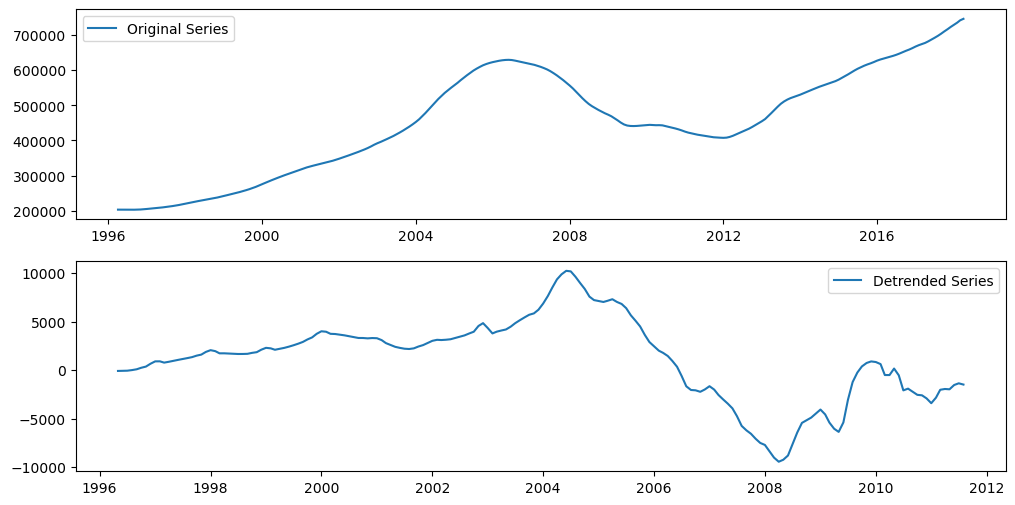

In [52]:
# Plot the original and detrended series
plt.figure(figsize=(12, 6))
plt.subplot(211)

plt.plot(new_ca_df, label='Original Series')
#plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(new_ca_df_detrended, label='Detrended Series')
plt.legend(loc='best')
plt.show()

## ARIMA

For this ARIMA model, we are interested in 3 components that will be used in ensuring the models runs as effectively as possible. the 3 components include; 
* the order of differencing, d
* autoregression, p
* moving average components, to handle non-seasonal data, q

We now use the code below to plot the ACF, and PACF graphs in order to determine the autoregression value, p, that will be used in the model.


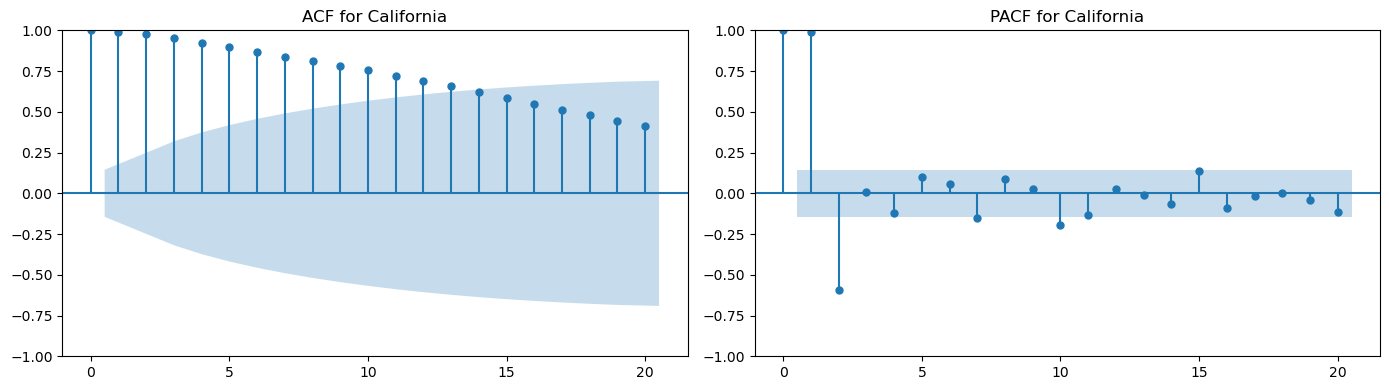

In [53]:
label = 'California'
max_lags_acf = min(20, len(new_ca_df_detrended)-1)  # Adjust lags for ACF based on data length
max_lags_pacf = min(max_lags_acf, len(new_ca_df_detrended)//2 - 1)  # Adjust lags for PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Plot ACF
plot_acf(new_ca_df_detrended, ax=ax[0], lags=max_lags_acf)
ax[0].set_title(f'ACF for {label}')
# Plot PACF
if max_lags_pacf > 0:  # Ensure we have at least one lag for PACF
    plot_pacf(new_ca_df_detrended, ax=ax[1], lags=max_lags_pacf)
    ax[1].set_title(f'PACF for {label}')
else:
    ax[1].set_title(f'PACF for {label} (Not enough data for PACF)')
plt.tight_layout()
plt.show()

For the value of the order of differencing, d, we assume it to be 1 and we set q to 0.
We then loop through the range 0 to 5 using the specified d and q values in order to find the most suitable value of p to be used in the model. An AIC value is also generated that helps in determining the best p value to choose. The p value with the lowest AIC value is the one to be choosen.

ADF Statistic: -1.7320126883572704
p-value: 0.41469860212538445
p: 0, AIC: 2783.6332198787813
p: 1, AIC: 2656.1314256103587
p: 2, AIC: 2646.5738856929465
p: 3, AIC: 2638.3455061254717
p: 4, AIC: 2626.8043701925562
Best p based on AIC: 4


/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was p

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  184
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1308.402
Date:                Sun, 28 Jul 2024   AIC                           2626.804
Time:                        23:08:42   BIC                           2642.852
Sample:                    05-01-1996   HQIC                          2633.309
                         - 08-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0072      0.040     25.248      0.000       0.929       1.085
ar.L2         -0.5759      0.058     -9.986      0.000      -0.689      -0.463
ar.L3          0.4865      0.059      8.274      0.0

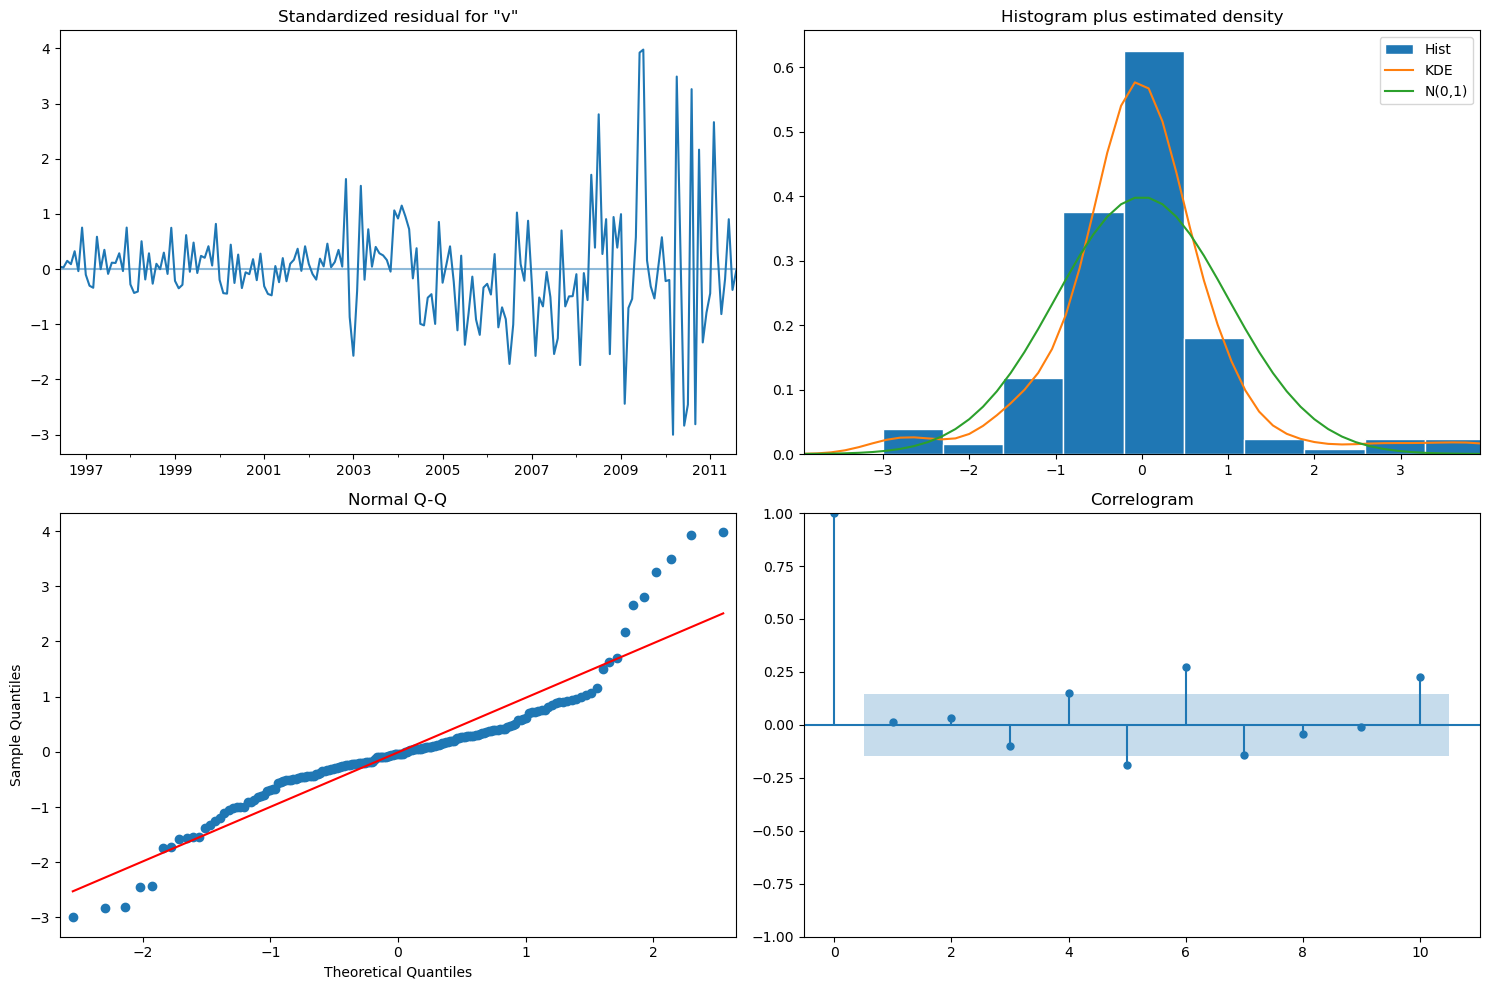

In [54]:
# Assume new_ca_df_detrended is your detrended time series
# Determine d using ADF test
result = adfuller(new_ca_df_detrended)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Assuming d = 1 based on differencing once
d = 1

# Fit ARIMA models with different p values and compare AIC
aic_values = []
p_values = range(0, 5)  # Trying p values from 0 to 4

for p in p_values:
    model = ARIMA(new_ca_df_detrended, order=(p, d, 0)).fit()
    aic_values.append((p, model.aic))

# Print AIC values for different p
for p, aic in aic_values:
    print(f'p: {p}, AIC: {aic}')

# Select the best p based on AIC
best_p = sorted(aic_values, key=lambda x: x[1])[0][0]
print(f'Best p based on AIC: {best_p}')

# Fit the best ARIMA model
best_model = ARIMA(new_ca_df_detrended, order=(best_p, d, 0)).fit()

# Print model summary
print(best_model.summary())

# Plot diagnostics of the best model
best_model.plot_diagnostics(figsize=(15, 10))
plt.tight_layout()
plt.show()

We then plot the Forecast predicted by the model.

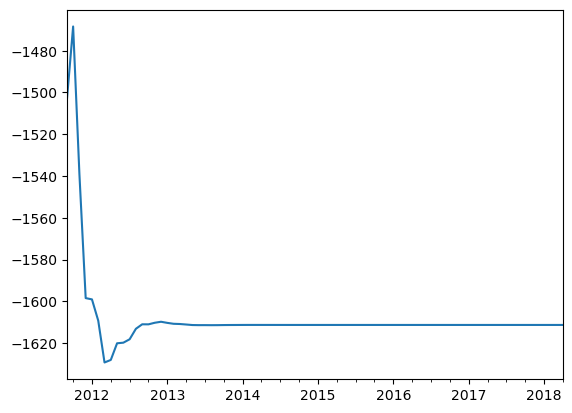

In [55]:
# Evaluating the model and making forecasts
new_ca_df_detrended_forecast = model.forecast(steps=80)

# Printing the forecasted values

new_ca_df_detrended_forecast.plot();

### ARIMA Model evaluation : RMSE
Calculate RMSE

In [56]:
print(len(ca_test_set), len(new_ca_df_detrended_forecast))

# Align lengths if they are different
ca_test_set = ca_test_set[:len(new_ca_df_detrended_forecast)]

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(ca_test_set, new_ca_df_detrended_forecast)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

80 80
Root Mean Squared Error (RMSE): 578909.2920024375


## SARIMA
Similar to the ARIMA Model, SARIMA also incorporates the 3 components(p, d, q) but also includes another term,s , that stands for seasonality. By incorporating seasonality SARIMA improves the forecast accuracy for seasonal time series data.

In [57]:
order = (4, 1, 0)  # (p, d, q)
seasonal_order = (4, 1, 0, 12)  # (P, D, Q, S)

sarima_model = SARIMAX(train_set['value'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56674D+01    |proj g|=  3.98627D+00


 This problem is unconstrained.



At iterate    5    f=  8.63934D+00    |proj g|=  5.14115D-01

At iterate   10    f=  8.29268D+00    |proj g|=  8.68334D-01

At iterate   15    f=  7.81984D+00    |proj g|=  2.47999D-01

At iterate   20    f=  7.80620D+00    |proj g|=  5.97042D-03

At iterate   25    f=  7.80614D+00    |proj g|=  3.29503D-03

At iterate   30    f=  7.80362D+00    |proj g|=  8.83828D-02

At iterate   35    f=  7.64193D+00    |proj g|=  6.61954D-01

At iterate   40    f=  7.50426D+00    |proj g|=  4.73655D-01

At iterate   45    f=  7.45028D+00    |proj g|=  9.19623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     48     58   

### RMSE

In [58]:
# Forecast
sarima_forecast = sarima_result.get_forecast(steps=len(test_set))
forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE (Root Mean Squared Error) or other metrics
rmse = np.sqrt(mean_squared_error(test_set['value'], forecast_mean))
print(f"RMSE: {rmse}")

RMSE: 87963.58824732622


We then plot the prediction of the SARIMA model and compare it with the original observed forecast

ADF Statistic: -1.7320126883572704
p-value: 0.41469860212538445
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.20217D+00    |proj g|=  1.03472D-01

At iterate    5    f=  7.19023D+00    |proj g|=  8.07568D-04

At iterate   10    f=  7.19002D+00    |proj g|=  1.20724D-02

At iterate   15    f=  7.18966D+00    |proj g|=  2.49733D-04

At iterate   20    f=  7.18787D+00    |proj g|=  6.29485D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     22     27      1     0     0 

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RMSE: 238565.67325978389


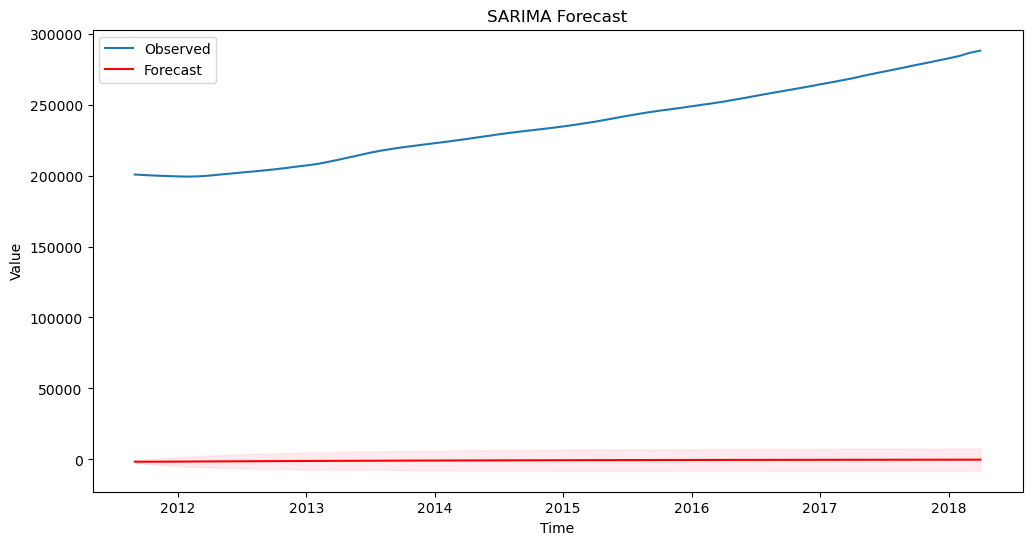

In [59]:
# Detrending and preparing your time series data

# Determine d using ADF test
result = adfuller(new_ca_df_detrended)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Fit SARIMA model
order = (2, 0, 1) # p, d, q
seasonal_order = (0, 0, 0, 12) # p, d, q, s

sarima_model = SARIMAX(new_ca_df_detrended, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Print model summary
print(sarima_result.summary())

# Forecast future values
sarima_forecast = sarima_result.get_forecast(steps=len(test_set))
forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_set['value'], forecast_mean))
print(f"RMSE: {rmse}")

# Plotting forecast
plt.figure(figsize=(12, 6))
plt.plot(test_set.index, test_set['value'], label='Observed')
plt.plot(test_set.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(test_set.index,
                 sarima_forecast.conf_int()['lower value'],
                 sarima_forecast.conf_int()['upper value'], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


After making the prediction we select the city with the best ROI and recommend it for investment

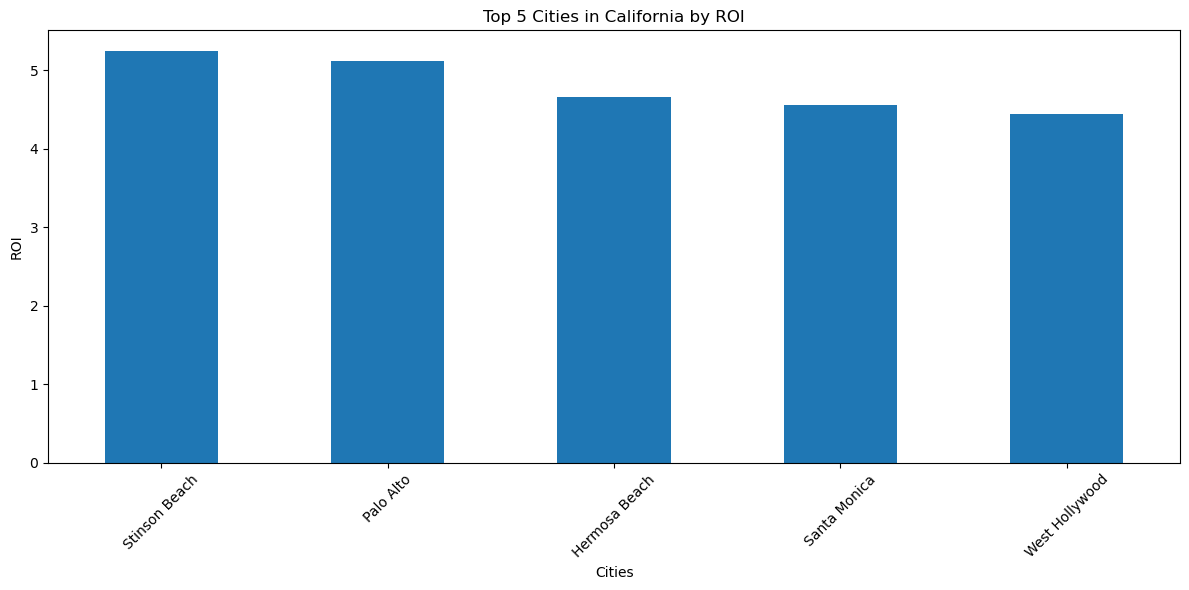

In [60]:
# Checking on top 5 cities in California by ROI

plt.figure(figsize=(12, 6))
top_cities = ca_df.groupby('City')['ROI'].mean().nlargest(5)
top_cities.plot(kind='bar')
plt.title("Top 5 Cities in California by ROI")
plt.xlabel("Cities")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the plot above, we also recommend investment in the best city in the state of California, Stinson Beach, since it has the best Return On Investment.

## State 2: Pennsylvania

In [61]:
SB_df = melted_df[melted_df['State'] == 'Pennsylvania']
SB_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
111,17603,65133,119,Lancaster,Pennsylvania,Lancaster,Lancaster,0.669327,0.17799,1996-04-01,87700.0,April,1996
118,15601,64180,126,Greensburg,Pennsylvania,Pittsburgh,Westmoreland,2.842105,0.287405,1996-04-01,36100.0,April,1996
187,19111,65779,195,Philadelphia,Pennsylvania,Philadelphia,Philadelphia,0.936170,0.26904,1996-04-01,84600.0,April,1996
275,19124,65791,283,Philadelphia,Pennsylvania,Philadelphia,Philadelphia,0.779582,0.250312,1996-04-01,43100.0,April,1996
322,19446,65933,330,Lansdale,Pennsylvania,Philadelphia,Montgomery,0.921442,0.226077,1996-04-01,155300.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899513,18915,65630,14497,Hatfield,Pennsylvania,Philadelphia,Montgomery,0.872958,0.219945,2018-04-01,327000.0,April,2018
3899580,15015,63834,14564,Bradfordwoods,Pennsylvania,Pittsburgh,Allegheny,0.756432,0.174012,2018-04-01,323300.0,April,2018
3899638,16836,64760,14622,Girard,Pennsylvania,DuBois,Clearfield,2.785185,0.360357,2018-04-01,58300.0,April,2018
3899669,17006,64839,14653,Toboyne,Pennsylvania,Harrisburg,Perry,0.832447,0.163201,2018-04-01,70800.0,April,2018


In [62]:
new_SB_df = SB_df.groupby('time')['value'].mean()

new_SB_df = pd.DataFrame(new_SB_df)
new_SB_df

,value
time,
1996-04-01,90519.494585
1996-05-01,90589.290012
1996-06-01,90654.512635
1996-07-01,90710.589651
1996-08-01,90774.488568
...,...
2017-12-01,181433.212996
2018-01-01,182165.342960
2018-02-01,182977.135981


In [63]:
# Drop duplicates and calculate mean for each unique date
new_SB_df = new_SB_df.groupby('time').mean()
new_SB_df.head(40)

,value
time,
1996-04-01,90519.494585
1996-05-01,90589.290012
1996-06-01,90654.512635
1996-07-01,90710.589651
1996-08-01,90774.488568
1996-09-01,90852.466907
1996-10-01,90959.807461
1996-11-01,91088.086643
1996-12-01,91288.567990


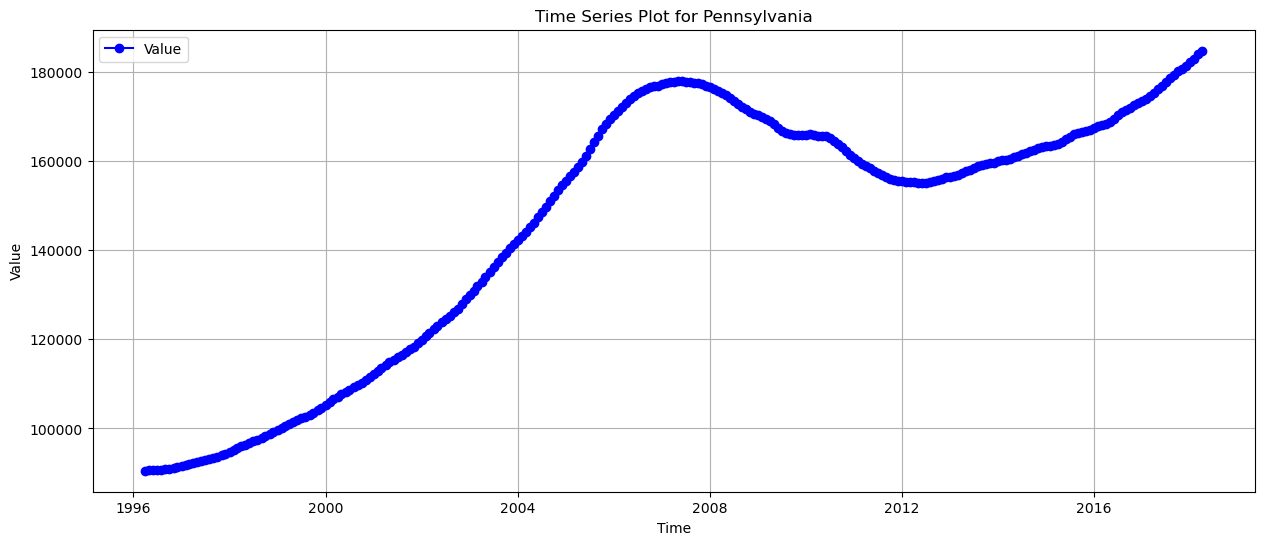

In [64]:
# Plotting the 'value' column
plt.figure(figsize=(15, 6))
plt.plot(new_SB_df['value'], marker='o', linestyle='-', color='b', label='Value')
plt.title('Time Series Plot for Pennsylvania')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [65]:
# Split the time series into train and test sets
SB_train_set, SB_test_set = split_train_test(new_SB_df)

# Print the sizes of the train and test sets
print("Train set size:", len(SB_train_set))
print("Test set size:", len(SB_test_set))

Train set size: 185
Test set size: 80


In [66]:

# Detrend the series by differencing

new_SB_df_detrended = SB_train_set.diff().dropna()
new_SB_df_detrended

,value
time,
1996-05-01,69.795427
1996-06-01,65.222623
1996-07-01,56.077016
1996-08-01,63.898917
1996-09-01,77.978339
...,...
2011-04-01,-535.860409
2011-05-01,-513.838748
2011-06-01,-560.529483


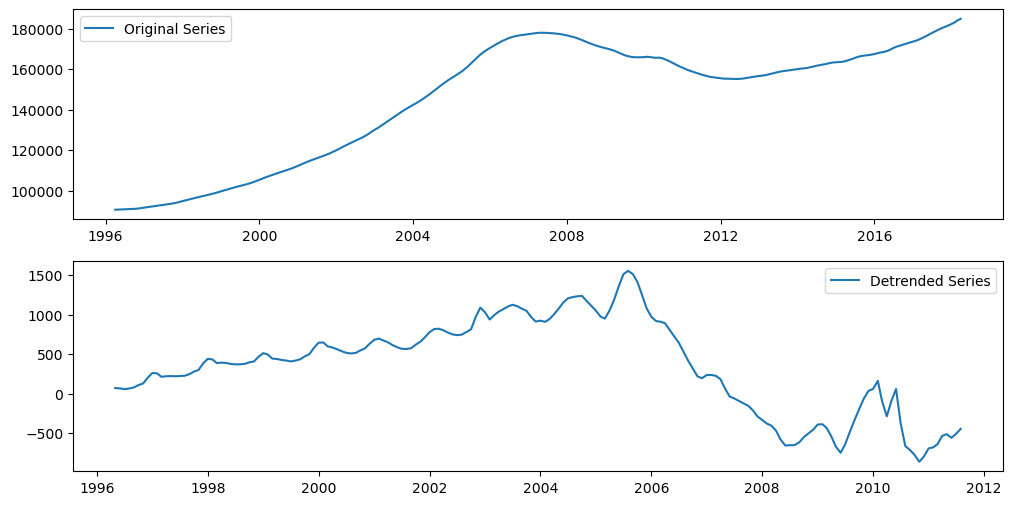

In [67]:
# Plot the original and detrended series
plt.figure(figsize=(12, 6))
plt.subplot(211)

plt.plot(new_SB_df, label='Original Series')
#plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(new_SB_df_detrended, label='Detrended Series')
plt.legend(loc='best')
plt.show()

### ARIMA

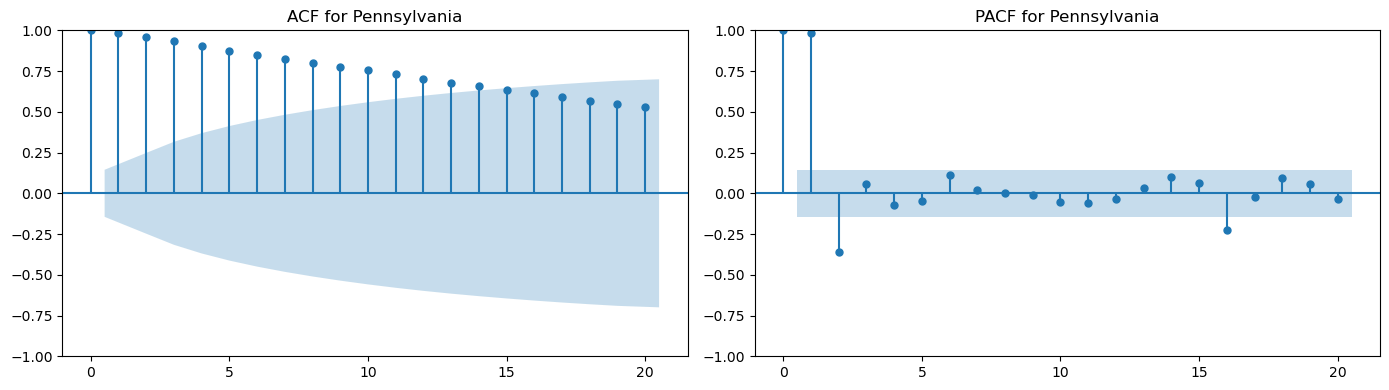

In [68]:
label = 'Pennsylvania'
max_lags_acf = min(20, len(new_SB_df_detrended)-1)  # Adjust lags for ACF based on data length
max_lags_pacf = min(max_lags_acf, len(new_SB_df_detrended)//2 - 1)  # Adjust lags for PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Plot ACF
plot_acf(new_SB_df_detrended, ax=ax[0], lags=max_lags_acf)
ax[0].set_title(f'ACF for {label}')
# Plot PACF
if max_lags_pacf > 0:  # Ensure we have at least one lag for PACF
    plot_pacf(new_SB_df_detrended, ax=ax[1], lags=max_lags_pacf)
    ax[1].set_title(f'PACF for {label}')
else:
    ax[1].set_title(f'PACF for {label} (Not enough data for PACF)')
plt.tight_layout()
plt.show()

ADF Statistic: -0.7419095470179647
p-value: 0.835593399247849


/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was p

p: 0, AIC: 2120.481614820263
p: 1, AIC: 2063.141297889421
p: 2, AIC: 2047.0992826665188
p: 3, AIC: 2024.4820427933923
p: 4, AIC: 2011.326419053783
Best p based on AIC: 4
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  184
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1000.663
Date:                Sun, 28 Jul 2024   AIC                           2011.326
Time:                        23:08:57   BIC                           2027.374
Sample:                    05-01-1996   HQIC                          2017.831
                         - 08-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8969      0.063     14.

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


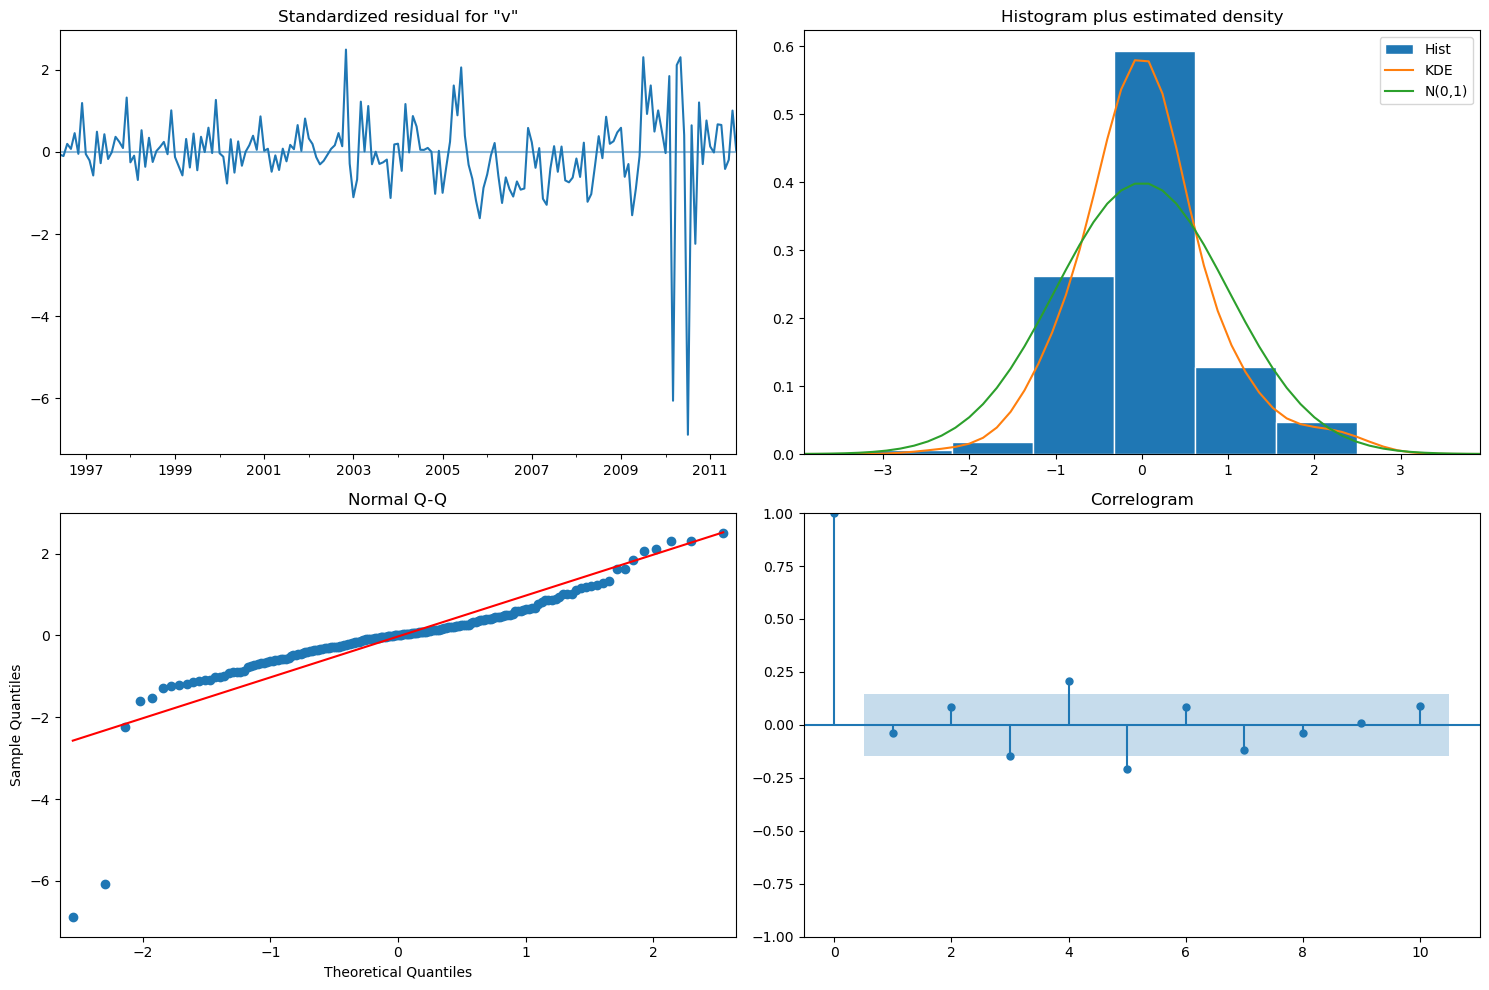

In [69]:
# Assume new_SB_df_detrended is your detrended time series

# Determine d using ADF test
result = adfuller(new_SB_df_detrended)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Assuming d = 1 based on differencing once
d = 1

# Fit ARIMA models with different p values and compare AIC
aic_values = []
p_values = range(0, 5)  # Trying p values from 0 to 4

for p in p_values:
    model = ARIMA(new_SB_df_detrended, order=(p, d, 0)).fit()
    aic_values.append((p, model.aic))

# Print AIC values for different p
for p, aic in aic_values:
    print(f'p: {p}, AIC: {aic}')

# Select the best p based on AIC
best_p = sorted(aic_values, key=lambda x: x[1])[0][0]
print(f'Best p based on AIC: {best_p}')

# Fit the best ARIMA model
best_model = ARIMA(new_SB_df_detrended, order=(best_p, d, 0)).fit()

# Print model summary
print(best_model.summary())

# Plot diagnostics of the best model
best_model.plot_diagnostics(figsize=(15, 10))
plt.tight_layout()
plt.show()

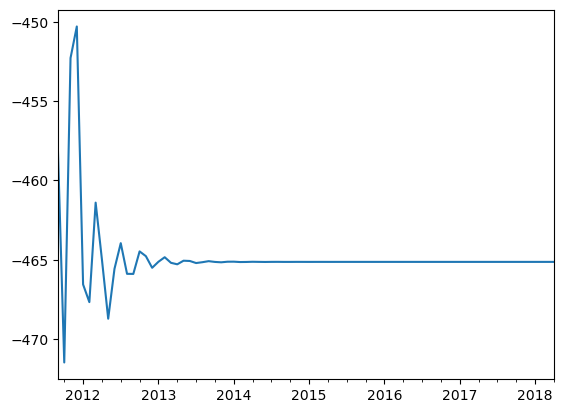

In [70]:
# Evaluating the model and making forecasts
new_SB_df_detrended_forecast = model.forecast(steps=80)

# Printing the forecasted values

new_SB_df_detrended_forecast.plot();

In [71]:
#print(len(SB_test_set), len(new_SB_df_detrended_forecast))

# Align lengths if they are different
#SB_test_set = SB_test_set[:len(new_SB_df_detrended_forecast)]

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(SB_test_set, new_SB_df_detrended_forecast)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 165816.28276995636


### SARIMA

In [72]:
order = (3, 1, 0)  # (p, d, q)
seasonal_order = (3, 1, 0, 12)  # (P, D, Q, S)

sarima_model = SARIMAX(SB_train_set['value'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.25547D+00    |proj g|=  1.47783D+00


/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  6.32953D+00    |proj g|=  1.36662D-01

At iterate   10    f=  6.15248D+00    |proj g|=  4.39721D-02

At iterate   15    f=  6.15085D+00    |proj g|=  5.44244D-03

At iterate   20    f=  6.14542D+00    |proj g|=  9.12614D-02

At iterate   25    f=  6.08585D+00    |proj g|=  4.72060D-02

At iterate   30    f=  6.08321D+00    |proj g|=  2.58534D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     36      1     0     0   3.558D-06   6.083D+00
  F =   6.0832060916749899     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [73]:
# Forecast
sarima_forecast = sarima_result.get_forecast(steps=len(SB_test_set))
forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE (Root Mean Squared Error) or other metrics
rmse = np.sqrt(mean_squared_error(SB_test_set['value'], forecast_mean))
print(f"RMSE: {rmse}")

RMSE: 35103.60852673437


ADF Statistic: -0.7419095470179647
p-value: 0.835593399247849
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54698D+00    |proj g|=  9.69605D-02


/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.



At iterate    5    f=  5.54063D+00    |proj g|=  1.72194D-03

At iterate   10    f=  5.53810D+00    |proj g|=  2.03687D-02

At iterate   15    f=  5.53724D+00    |proj g|=  4.13365D-03

At iterate   20    f=  5.53711D+00    |proj g|=  1.06399D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     23      1     0     0   4.099D-06   5.537D+00
  F =   5.5371083963152037     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  184
Model:           

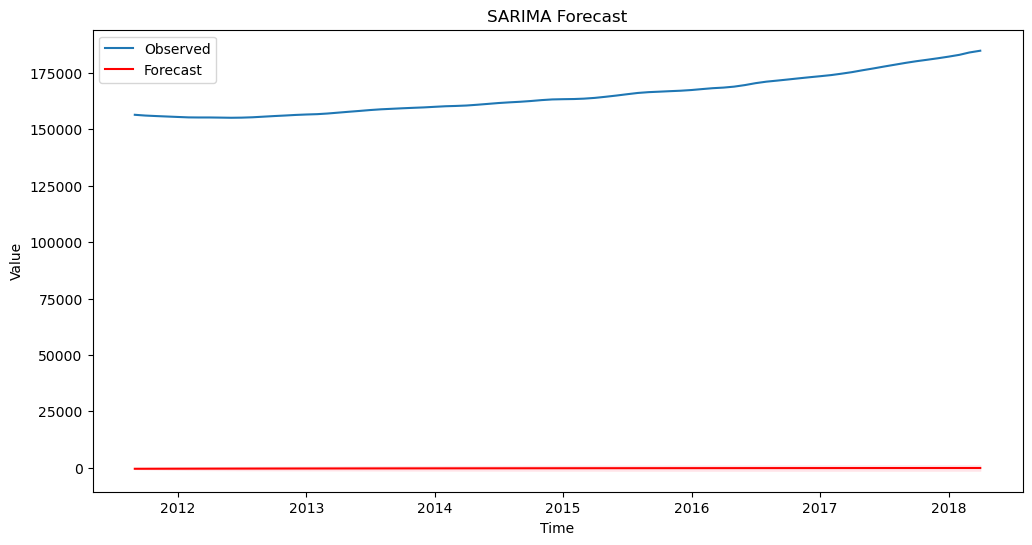

In [74]:
# Detrending and preparing your time series data

# Determine d using ADF test
result = adfuller(new_SB_df_detrended)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Fit SARIMA model
order = (2, 0, 1) # p, d, q
seasonal_order = (0, 0, 0, 12) # p, d, q, s

sarima_model = SARIMAX(new_SB_df_detrended, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Print model summary
print(sarima_result.summary())

# Forecast future values
sarima_forecast = sarima_result.get_forecast(steps=len(SB_test_set))
forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(SB_test_set['value'], forecast_mean))
print(f"RMSE: {rmse}")

# Plotting forecast
plt.figure(figsize=(12, 6))
plt.plot(SB_test_set.index, SB_test_set['value'], label='Observed')
plt.plot(SB_test_set.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(SB_test_set.index,
                 sarima_forecast.conf_int()['lower value'],
                 sarima_forecast.conf_int()['upper value'], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


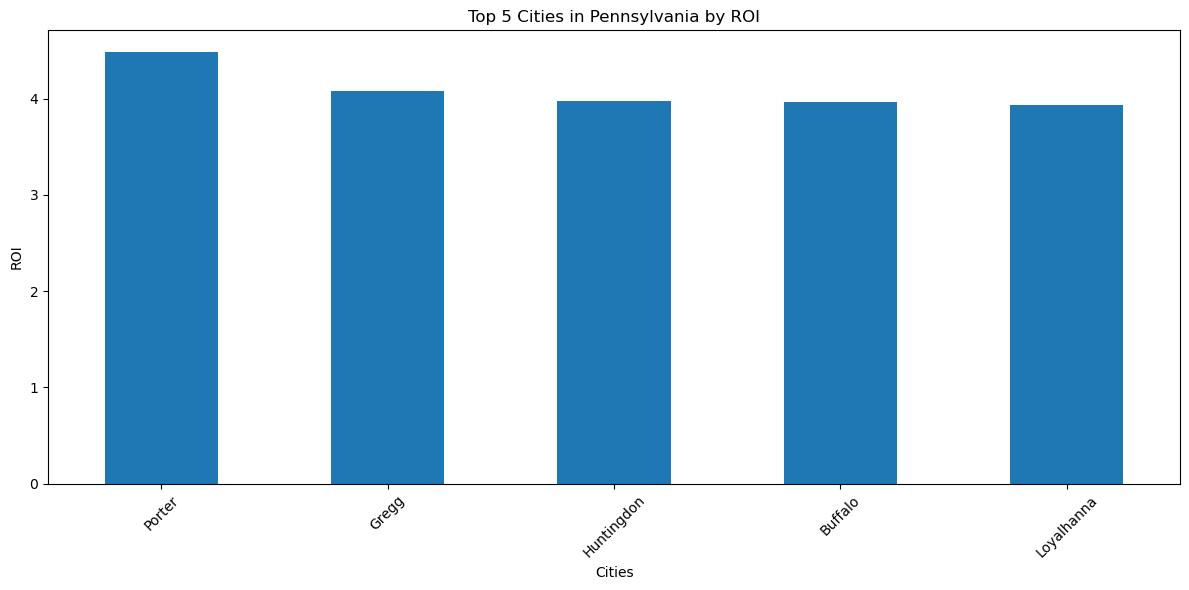

In [75]:
# Checking on top 5 cities in Pennsylvania by ROI

plt.figure(figsize=(12, 6))
top_cities = SB_df.groupby('City')['ROI'].mean().nlargest(5)
top_cities.plot(kind='bar')
plt.title("Top 5 Cities in Pennsylvania by ROI")
plt.xlabel("Cities")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the plot above, we also recommend investment in the best city in the state of Pennsylvania, Porter, since it has the best Return On Investment.

## State 3: Florida

In [76]:
FL_df = melted_df[melted_df['State'] == 'Florida']
FL_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
4,32162,71831,12,The Villages,Florida,The Villages,Sumter,1.459406,0.294064,1996-04-01,101000.0,April,1996
53,33160,72463,61,Sunny Isles Beach,Florida,Miami-Fort Lauderdale,Miami-Dade,3.344797,0.420636,1996-04-01,337300.0,April,1996
75,33025,72363,83,Miramar,Florida,Miami-Fort Lauderdale,Broward,1.490143,0.321344,1996-04-01,111600.0,April,1996
76,33411,72578,84,Royal Palm Beach,Florida,Miami-Fort Lauderdale,Palm Beach,1.309148,0.325074,1996-04-01,126800.0,April,1996
77,33139,72442,85,Miami Beach,Florida,Miami-Fort Lauderdale,Miami-Dade,5.037901,0.485829,1996-04-01,480200.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899267,34797,73224,14251,Yalaha,Florida,Orlando,Lake,0.948897,0.254372,2018-04-01,193500.0,April,2018
3899279,32193,71852,14263,Welaka,Florida,Palatka,Putnam,0.565056,0.300956,2018-04-01,118300.0,April,2018
3899332,33051,72384,14316,Key Colony Beach,Florida,Key West,Monroe,1.892186,0.400291,2018-04-01,585300.0,April,2018
3899575,33855,72865,14559,Lake Wales,Florida,Lakeland,Polk,0.661597,0.089606,2018-04-01,143000.0,April,2018


In [77]:
new_FL_df = FL_df.groupby('time')['value'].mean()

new_FL_df = pd.DataFrame(new_FL_df)
new_FL_df

,value
time,
1996-04-01,104976.942675
1996-05-01,105040.382166
1996-06-01,105106.878981
1996-07-01,105169.936306
1996-08-01,105257.579618
...,...
2017-12-01,280250.955414
2018-01-01,281561.401274
2018-02-01,283416.178344


In [78]:
# Drop duplicates and calculate mean for each unique date
new_FL_df = new_FL_df.groupby('time').mean()
new_FL_df.head(40)

,value
time,
1996-04-01,104976.942675
1996-05-01,105040.382166
1996-06-01,105106.878981
1996-07-01,105169.936306
1996-08-01,105257.579618
1996-09-01,105376.050955
1996-10-01,105545.095541
1996-11-01,105751.847134
1996-12-01,106071.210191


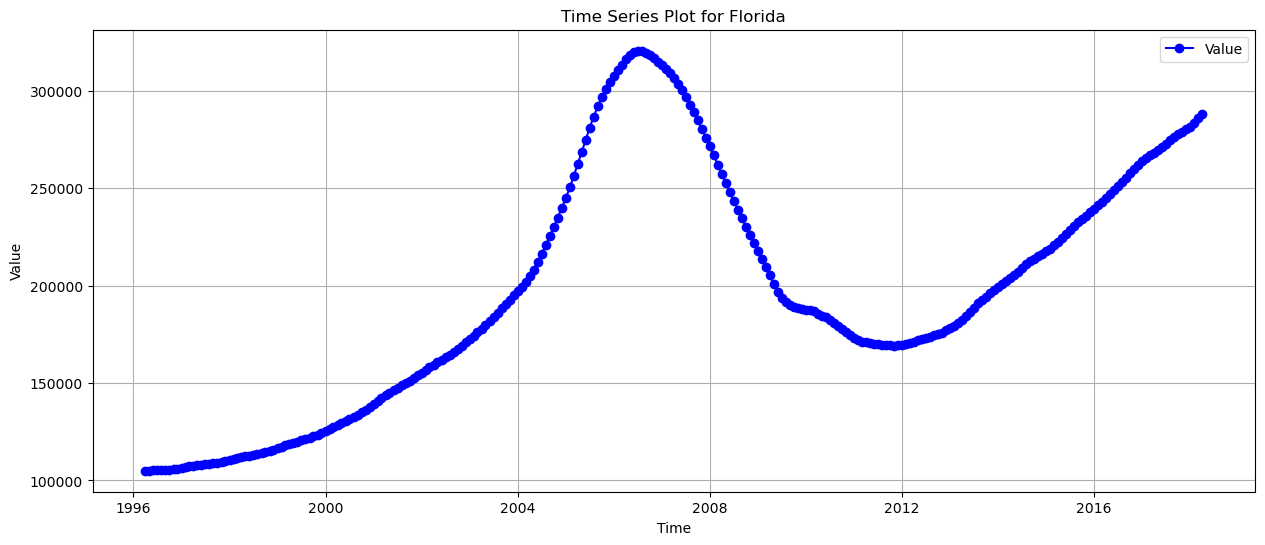

In [79]:
# Plotting the 'value' column
plt.figure(figsize=(15, 6))
plt.plot(new_FL_df['value'], marker='o', linestyle='-', color='b', label='Value')
plt.title('Time Series Plot for Florida')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [80]:
# Split the time series into train and test sets
FL_train_set, FL_test_set = split_train_test(new_FL_df)

# Print the sizes of the train and test sets
print("Train set size:", len(FL_train_set))
print("Test set size:", len(FL_test_set))

Train set size: 185
Test set size: 80


In [81]:

# Detrend the series by differencing

new_FL_df_detrended = FL_train_set.diff().dropna()
new_FL_df_detrended

,value
time,
1996-05-01,63.439490
1996-06-01,66.496815
1996-07-01,63.057325
1996-08-01,87.643312
1996-09-01,118.471338
...,...
2011-04-01,-321.019108
2011-05-01,-328.789809
2011-06-01,-486.369427


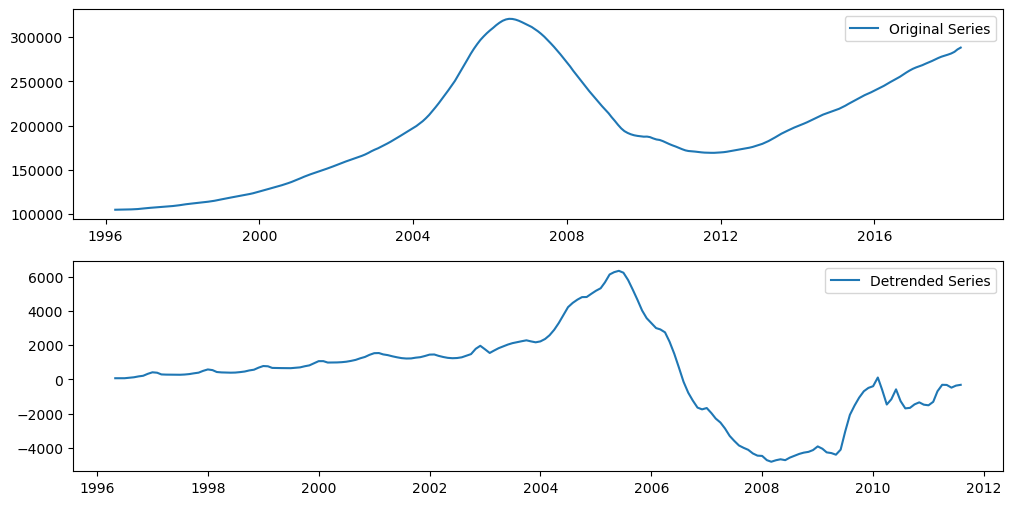

In [82]:
# Plot the original and detrended series
plt.figure(figsize=(12, 6))
plt.subplot(211)

plt.plot(new_FL_df, label='Original Series')
#plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(new_FL_df_detrended, label='Detrended Series')
plt.legend(loc='best')
plt.show()

### ARIMA

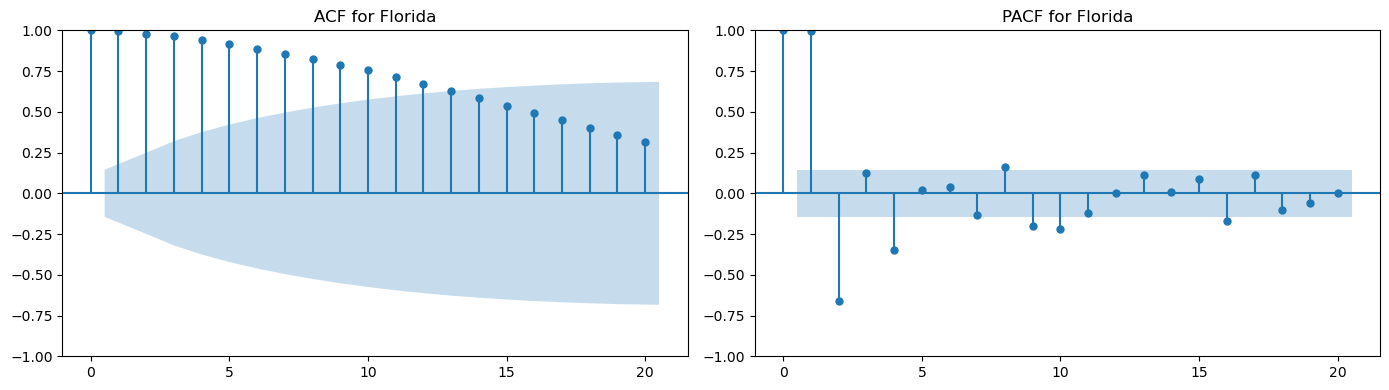

In [83]:
label = 'Florida'
max_lags_acf = min(20, len(new_FL_df_detrended)-1)  # Adjust lags for ACF based on data length
max_lags_pacf = min(max_lags_acf, len(new_FL_df_detrended)//2 - 1)  # Adjust lags for PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Plot ACF
plot_acf(new_FL_df_detrended, ax=ax[0], lags=max_lags_acf)
ax[0].set_title(f'ACF for {label}')
# Plot PACF
if max_lags_pacf > 0:  # Ensure we have at least one lag for PACF
    plot_pacf(new_FL_df_detrended, ax=ax[1], lags=max_lags_pacf)
    ax[1].set_title(f'PACF for {label}')
else:
    ax[1].set_title(f'PACF for {label} (Not enough data for PACF)')
plt.tight_layout()
plt.show()

ADF Statistic: -2.143771884486825
p-value: 0.2272816594597672


/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was p

p: 0, AIC: 2575.0344709975643
p: 1, AIC: 2463.27027619365
p: 2, AIC: 2458.776137588115
p: 3, AIC: 2425.080406650972
p: 4, AIC: 2421.321561624374
Best p based on AIC: 4
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  184
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1205.661
Date:                Sun, 28 Jul 2024   AIC                           2421.322
Time:                        23:09:10   BIC                           2437.369
Sample:                    05-01-1996   HQIC                          2427.826
                         - 08-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9613      0.050     19.11

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


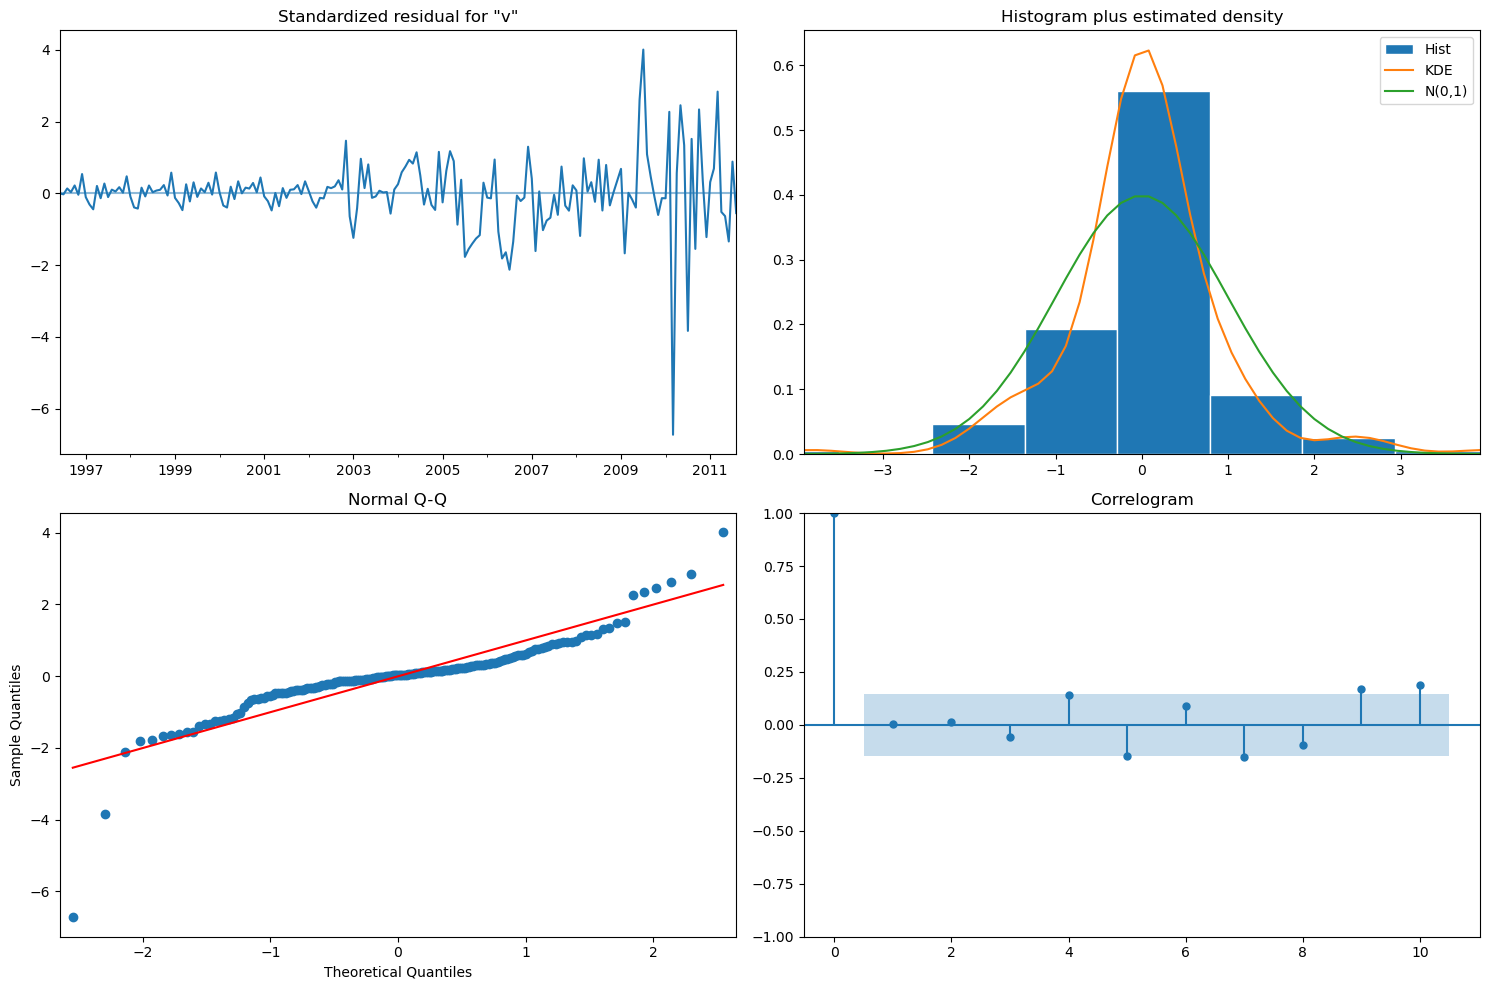

In [84]:
# Assume new_FL_df_detrended is your detrended time series

# Determine d using ADF test
result = adfuller(new_FL_df_detrended)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Assuming d = 1 based on differencing once
d = 1

# Fit ARIMA models with different p values and compare AIC
aic_values = []
p_values = range(0, 5)  # Trying p values from 0 to 4

for p in p_values:
    model = ARIMA(new_FL_df_detrended, order=(p, d, 0)).fit()
    aic_values.append((p, model.aic))

# Print AIC values for different p
for p, aic in aic_values:
    print(f'p: {p}, AIC: {aic}')

# Select the best p based on AIC
best_p = sorted(aic_values, key=lambda x: x[1])[0][0]
print(f'Best p based on AIC: {best_p}')

# Fit the best ARIMA model
best_model = ARIMA(new_FL_df_detrended, order=(best_p, d, 0)).fit()

# Print model summary
print(best_model.summary())

# Plot diagnostics of the best model
best_model.plot_diagnostics(figsize=(15, 10))
plt.tight_layout()
plt.show()

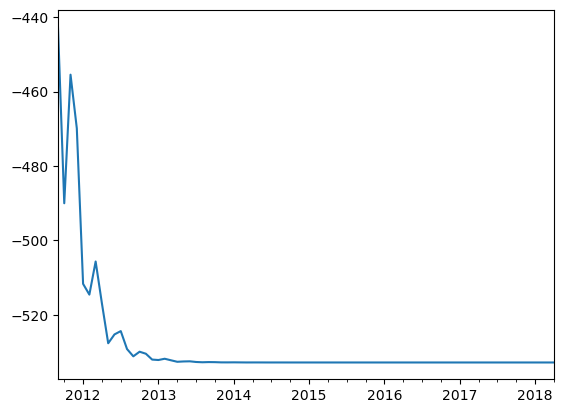

In [85]:
# Evaluating the model and making forecasts
new_FL_df_detrended_forecast = model.forecast(steps=80)

# Printing the forecasted values

new_FL_df_detrended_forecast.plot();

In [86]:
# Compute Mean Squared Error (MSE)
mse = mean_squared_error(FL_test_set, new_FL_df_detrended_forecast)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 224324.70984751542


### SARIMA

In [87]:
order = (4, 1, 0)  # (p, d, q)
seasonal_order = (4, 1, 0, 12)  # (P, D, Q, S)

sarima_model = SARIMAX(FL_train_set['value'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.65957D+01    |proj g|=  3.08449D+00

At iterate    5    f=  1.00496D+01    |proj g|=  4.93238D-01

At iterate   10    f=  1.00062D+01    |proj g|=  7.26333D-02
  ys=-1.470E-01  -gs= 1.249E-01 BFGS update SKIPPED

At iterate   15    f=  9.57423D+00    |proj g|=  4.17204D-01

At iterate   20    f=  9.46645D+00    |proj g|=  1.12749D-01

At iterate   25    f=  9.46386D+00    |proj g|=  6.13359D-03

At iterate   30    f=  9.45977D+00    |proj g|=  8.23236D-02

At iterate   35    f=  9.16815D+00    |proj g|=  5.71584D-01

At iterate   40    f=  8.43761D+00    |proj g|=  4.43327D-01

At iterate   45    f=  8.21541D+00    |proj g|=  6.76193D-02

At iterate   50    f=  8.21300D+00    |proj g|=  1.54904D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations


/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [88]:
# Forecast
sarima_forecast = sarima_result.get_forecast(steps=len(FL_test_set))
forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE (Root Mean Squared Error) or other metrics
rmse = np.sqrt(mean_squared_error(FL_test_set['value'], forecast_mean))
print(f"RMSE: {rmse}")

RMSE: 118438.48782866953


ADF Statistic: -2.143771884486825
p-value: 0.2272816594597672
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.68995D+00    |proj g|=  1.30833D-01

At iterate    5    f=  6.66005D+00    |proj g|=  8.34483D-04

At iterate   10    f=  6.65989D+00    |proj g|=  1.19151D-02

At iterate   15    f=  6.65848D+00    |proj g|=  5.48579D-04

At iterate   20    f=  6.65639D+00    |proj g|=  1.92025D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     24     27      1     0     0   

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  184
Model:               SARIMAX(2, 0, 1)   Log Likelihood               -1224.573
Date:                Sun, 28 Jul 2024   AIC                           2457.147
Time:                        23:09:23   BIC                           2470.007
Sample:                    05-01-1996   HQIC                          2462.359
                         - 08-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3958      0.062     22.611      0.000       1.275       1.517
ar.L2         -0.4090      0.060     -6.774      0.000      -0.527      -0.291
ma.L1          0.5707      0.046     12.490      0.0

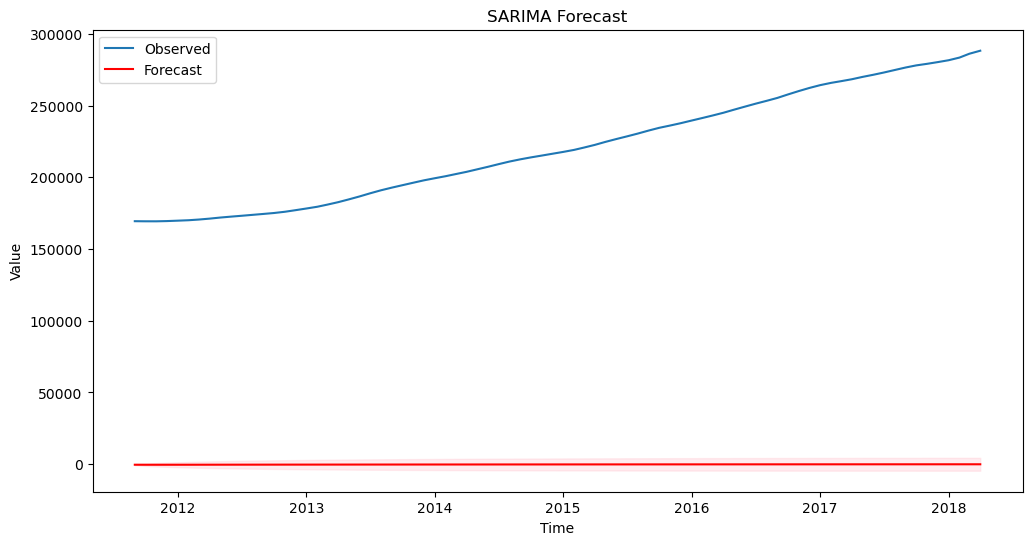

In [89]:
# Detrending and preparing your time series data

# Determine d using ADF test
result = adfuller(new_FL_df_detrended)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Fit SARIMA model
order = (2, 0, 1) # p, d, q
seasonal_order = (0, 0, 0, 12) # p, d, q, s

sarima_model = SARIMAX(new_FL_df_detrended, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Print model summary
print(sarima_result.summary())

# Forecast future values
sarima_forecast = sarima_result.get_forecast(steps=len(FL_test_set))
forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(FL_test_set['value'], forecast_mean))
print(f"RMSE: {rmse}")

# Plotting forecast
plt.figure(figsize=(12, 6))
plt.plot(FL_test_set.index, FL_test_set['value'], label='Observed')
plt.plot(FL_test_set.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(FL_test_set.index,
                 sarima_forecast.conf_int()['lower value'],
                 sarima_forecast.conf_int()['upper value'], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()


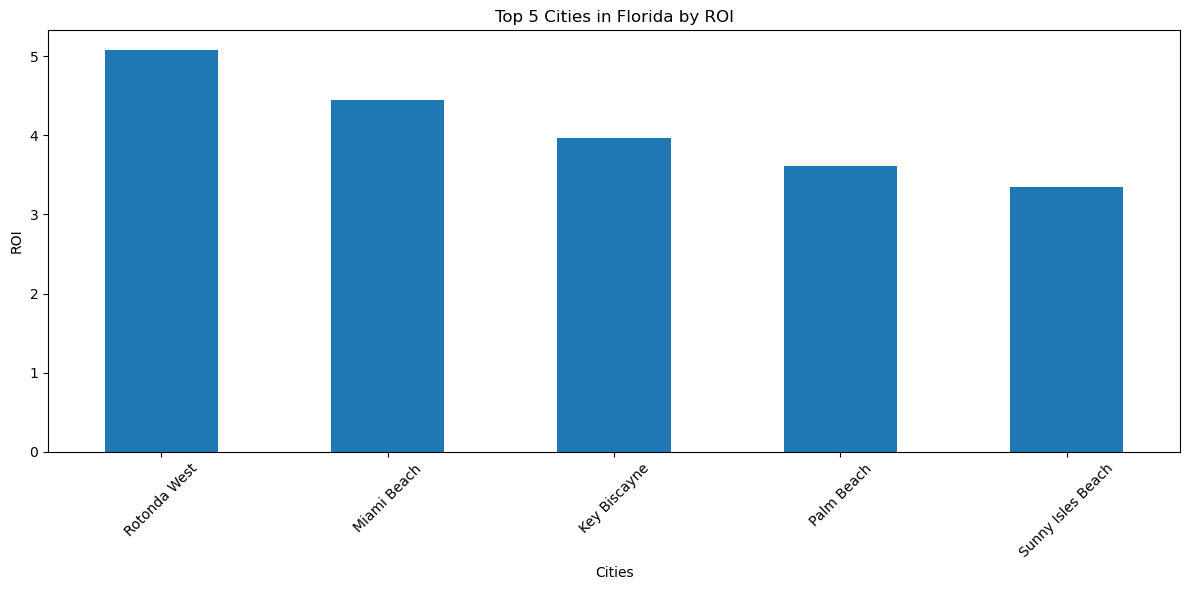

In [90]:
# Checking on top 5 cities in Florida by ROI

plt.figure(figsize=(12, 6))
top_cities = FL_df.groupby('City')['ROI'].mean().nlargest(5)
top_cities.plot(kind='bar')
plt.title("Top 5 Cities in Florida by ROI")
plt.xlabel("Cities")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the plot above, we also recommend investment in the best city in the state of Florida, Rotonda West, since it has the best Return On Investment.

## State 4: New York

In [91]:
ny_df = melted_df[melted_df['State'] == 'New York']
ny_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
3,11226,62037,11,New York,New York,New York,Kings,4.386420,0.431858,1996-04-01,162000.0,April,1996
5,11375,62087,13,New York,New York,New York,Queens,2.954834,0.350822,1996-04-01,252400.0,April,1996
6,11235,62045,14,New York,New York,New York,Kings,2.900787,0.336084,1996-04-01,190500.0,April,1996
13,10011,61625,21,New York,New York,New York,New York,2.187954,0.441639,1996-04-01,3762100.0,April,1996
14,10128,61703,22,New York,New York,New York,New York,0.991732,0.284336,1996-04-01,3676700.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899680,12153,62430,14664,Sand Lake,New York,Albany,Rensselaer,0.992685,0.260941,2018-04-01,207300.0,April,2018
3899710,12156,62433,14694,Schodack,New York,Albany,Rensselaer,0.952331,0.236837,2018-04-01,199400.0,April,2018
3899719,12480,62599,14703,Shandaken,New York,Kingston,Ulster,1.269394,0.316634,2018-04-01,163700.0,April,2018
3899732,12429,62556,14716,Esopus,New York,Kingston,Ulster,1.108557,0.30713,2018-04-01,177500.0,April,2018


In [92]:
new_ny_df = ny_df.groupby('time')['value'].mean()

new_ny_df = pd.DataFrame(new_ny_df)
new_ny_df

,value
time,
1996-04-01,156246.548323
1996-05-01,156171.992110
1996-06-01,156099.802761
1996-07-01,156020.414201
1996-08-01,155951.676529
...,...
2017-12-01,377180.769231
2018-01-01,378947.337278
2018-02-01,380672.189349


In [93]:
# Drop duplicates and calculate mean for each unique date
new_ny_df = new_ny_df.groupby('time').mean()
new_ny_df.head(40)

,value
time,
1996-04-01,156246.548323
1996-05-01,156171.992110
1996-06-01,156099.802761
1996-07-01,156020.414201
1996-08-01,155951.676529
1996-09-01,155898.717949
1996-10-01,155887.376726
1996-11-01,155921.104536
1996-12-01,156064.792899


In [94]:
new_ny_df.describe()

,value
count,265.000000
mean,272378.003424
std,66821.632591
min,155887.376726
25%,210279.881657
50%,292224.063116
75%,325727.218935
max,384127.416174


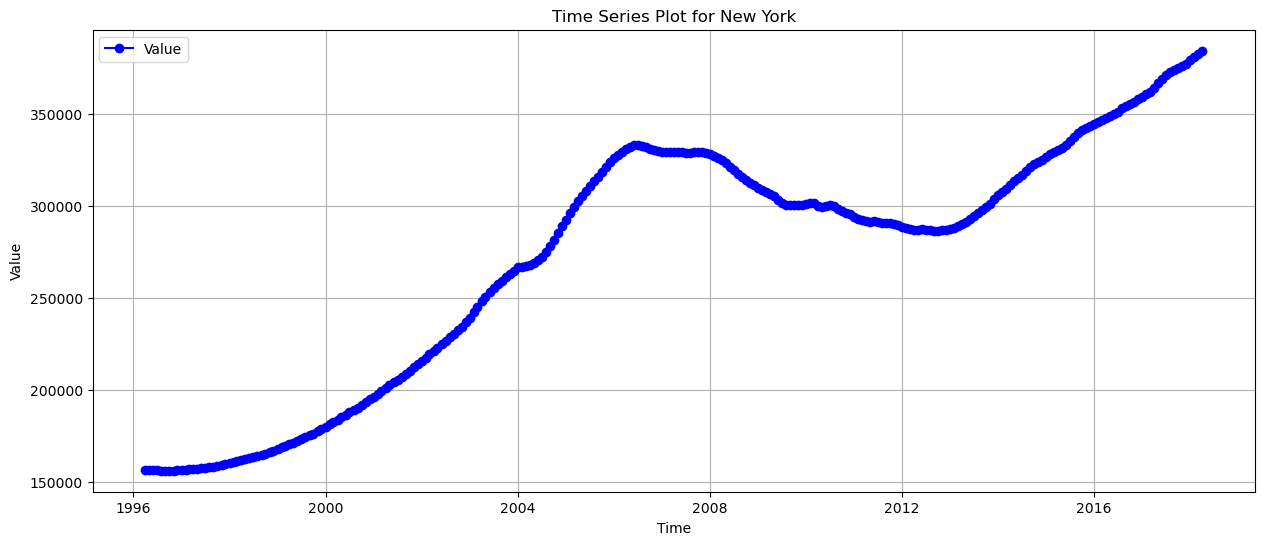

In [95]:
# Plotting the 'value' column
plt.figure(figsize=(15, 6))
plt.plot(new_ny_df['value'], marker='o', linestyle='-', color='b', label='Value')
plt.title('Time Series Plot for New York')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [96]:
# Split the time series into train and test sets
ny_train_set, ny_test_set = split_train_test(new_ny_df)

# Print the sizes of the train and test sets
print("Train set size:", len(ny_train_set))
print("Test set size:", len(ny_test_set))

Train set size: 185
Test set size: 80


In [97]:
# Calculate rolling mean
#rolling_mean = new_ca_df.rolling(window=12).mean()

# Detrend the series by subtracting the rolling mean
#new_ca_df_detrended = new_ca_df - rolling_mean
new_ny_df_detrended = ny_train_set.diff().dropna()
new_ny_df_detrended

,value
time,
1996-05-01,-74.556213
1996-06-01,-72.189349
1996-07-01,-79.388560
1996-08-01,-68.737673
1996-09-01,-52.958580
...,...
2011-04-01,-577.120316
2011-05-01,-98.717949
2011-06-01,150.098619


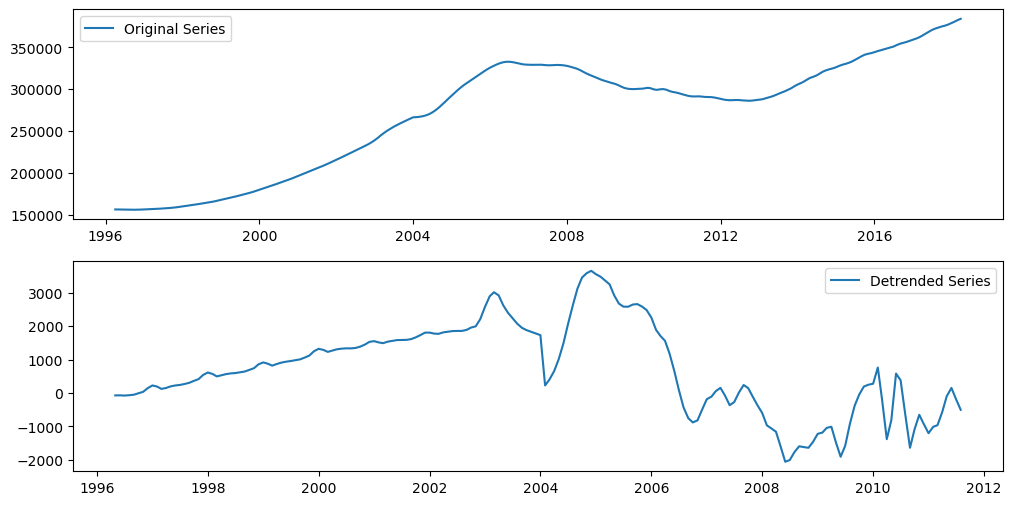

In [98]:
# Plot the original and detrended series
plt.figure(figsize=(12, 6))
plt.subplot(211)

plt.plot(new_ny_df, label='Original Series')
#plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(new_ny_df_detrended, label='Detrended Series')
plt.legend(loc='best')
plt.show()

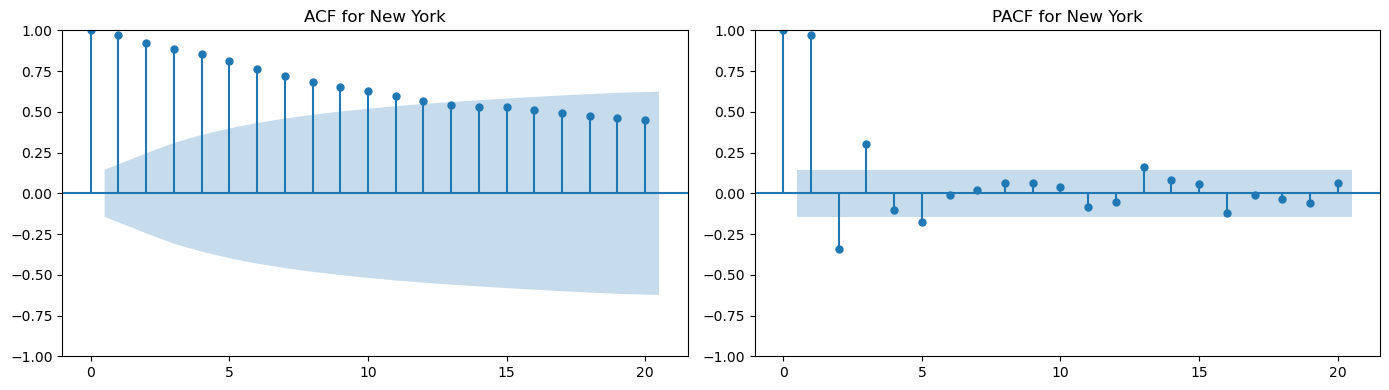

In [99]:
label = 'New York'
max_lags_acf = min(20, len(new_ny_df_detrended)-1)  # Adjust lags for ACF based on data length
max_lags_pacf = min(max_lags_acf, len(new_ny_df_detrended)//2 - 1)  # Adjust lags for PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Plot ACF
plot_acf(new_ny_df_detrended, ax=ax[0], lags=max_lags_acf)
ax[0].set_title(f'ACF for {label}')
# Plot PACF
if max_lags_pacf > 0:  # Ensure we have at least one lag for PACF
    plot_pacf(new_ny_df_detrended, ax=ax[1], lags=max_lags_pacf)
    ax[1].set_title(f'PACF for {label}')
else:
    ax[1].set_title(f'PACF for {label} (Not enough data for PACF)')
plt.tight_layout()
plt.show()

ADF Statistic: -2.0515922229900485
p-value: 0.26441948954244265


/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was p

p: 0, AIC: 2617.14082792128
p: 1, AIC: 2589.8152187298406
p: 2, AIC: 2561.576191289404
p: 3, AIC: 2559.983906911332
p: 4, AIC: 2558.5283884460914
Best p based on AIC: 4
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  184
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -1274.264
Date:                Sun, 28 Jul 2024   AIC                           2558.528
Time:                        23:09:27   BIC                           2574.576
Sample:                    05-01-1996   HQIC                          2565.033
                         - 08-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5690      0.036     16.0

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


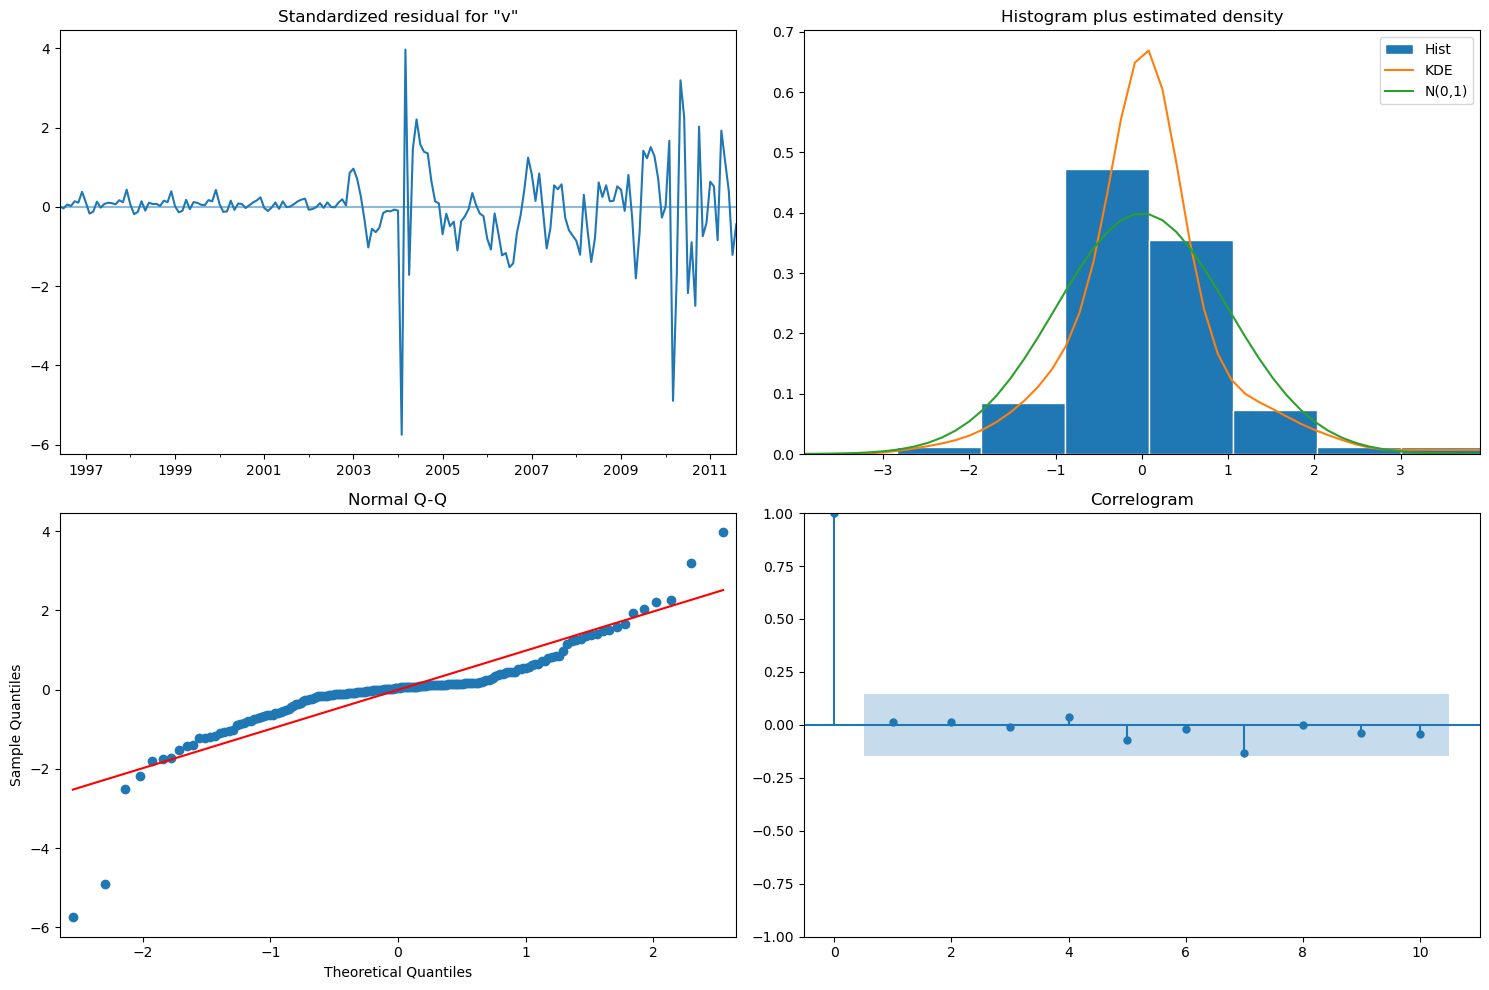

In [100]:
# Determine d using ADF test
result = adfuller(new_ny_df_detrended)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Assuming d = 1 based on differencing once
d = 1

# Fit ARIMA models with different p values and compare AIC
aic_values = []
p_values = range(0, 5)  # Trying p values from 0 to 4

for p in p_values:
    model = ARIMA(new_ny_df_detrended, order=(p, d, 0)).fit()
    aic_values.append((p, model.aic))

# Print AIC values for different p
for p, aic in aic_values:
    print(f'p: {p}, AIC: {aic}')

# Select the best p based on AIC
best_p = sorted(aic_values, key=lambda x: x[1])[0][0]
print(f'Best p based on AIC: {best_p}')

# Fit the best ARIMA model
best_model = ARIMA(new_ny_df_detrended, order=(best_p, d, 0)).fit()

# Print model summary
print(best_model.summary())

# Plot diagnostics of the best model
best_model.plot_diagnostics(figsize=(15, 10))
plt.tight_layout()
plt.show()


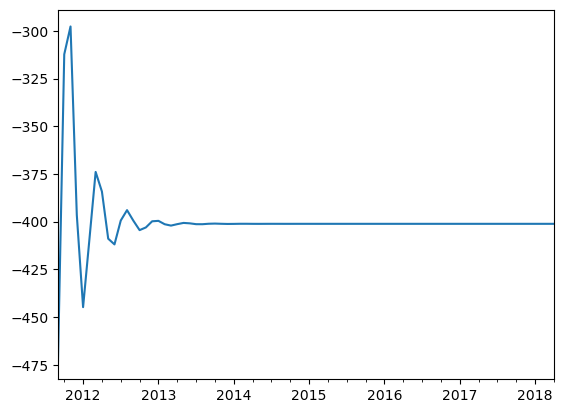

In [101]:
# Evaluating the model and making forecasts
new_ny_df_detrended_forecast = model.forecast(steps=80)

# Printing the forecasted values

new_ny_df_detrended_forecast.plot();

In [102]:
print(len(ny_test_set), len(new_ny_df_detrended_forecast))

# Align lengths if they are different
ny_test_set = ny_test_set[:len(new_ny_df_detrended_forecast)]

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(ny_test_set, new_ny_df_detrended_forecast)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

80 80
Root Mean Squared Error (RMSE): 328202.384043673


In [103]:
order = (4, 1, 0)  # (p, d, q)
seasonal_order = (4, 1, 0, 12)  # (P, D, Q, S)

sarima_model = SARIMAX(train_set['value'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.56674D+01    |proj g|=  3.98627D+00

At iterate    5    f=  8.63934D+00    |proj g|=  5.14115D-01

At iterate   10    f=  8.29268D+00    |proj g|=  8.68334D-01

At iterate   15    f=  7.81984D+00    |proj g|=  2.47999D-01

At iterate   20    f=  7.80620D+00    |proj g|=  5.97042D-03

At iterate   25    f=  7.80614D+00    |proj g|=  3.29503D-03

At iterate   30    f=  7.80362D+00    |proj g|=  8.83828D-02

At iterate   35    f=  7.64193D+00    |proj g|=  6.61954D-01

At iterate   40    f=  7.50426D+00    |proj g|=  4.73655D-01

At iterate   45    f=  7.45028D+00    |proj g|=  9.19623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

In [104]:
# Forecast
sarima_forecast = sarima_result.get_forecast(steps=len(test_set))
forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE (Root Mean Squared Error) or other metrics
rmse = np.sqrt(mean_squared_error(test_set['value'], forecast_mean))
print(f"RMSE: {rmse}")

RMSE: 87963.58824732622


ADF Statistic: -2.0515922229900485
p-value: 0.26441948954244265
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.32329D+00    |proj g|=  8.25937D-01

At iterate    5    f=  7.06989D+00    |proj g|=  2.86027D-01

At iterate   10    f=  7.00876D+00    |proj g|=  2.14941D-02

At iterate   15    f=  7.00349D+00    |proj g|=  6.45115D-05

At iterate   20    f=  7.00348D+00    |proj g|=  7.89677D-04

At iterate   25    f=  7.00342D+00    |proj g|=  1.68179D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  N

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RMSE: 238070.62896700407


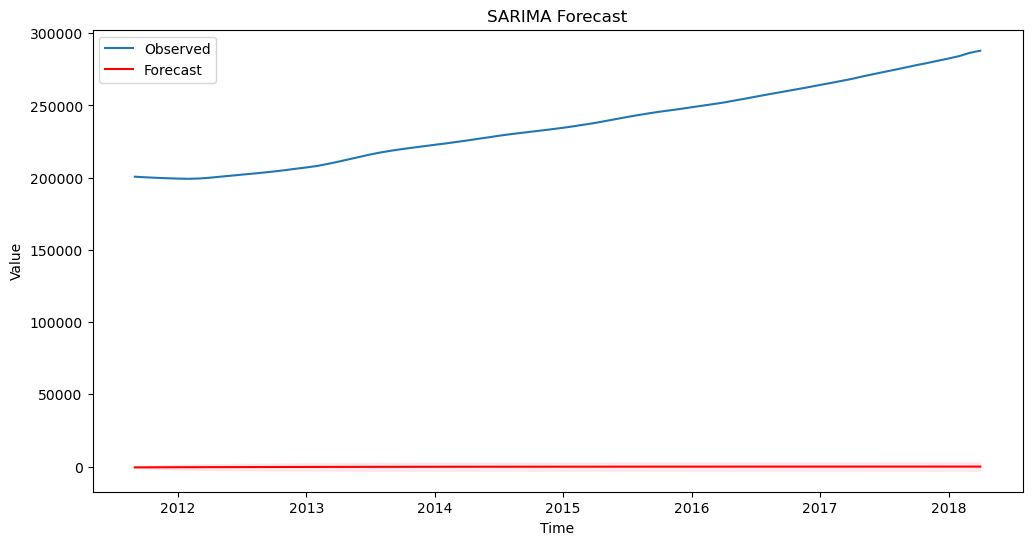

In [105]:
# Detrending and preparing your time series data

# Determine d using ADF test
result = adfuller(new_ny_df_detrended)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Fit SARIMA model
order = (2, 0, 1) # p, d, q
seasonal_order = (0, 0, 0, 12) # p, d, q, s

sarima_model = SARIMAX(new_ny_df_detrended, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Print model summary
print(sarima_result.summary())

# Forecast future values
sarima_forecast = sarima_result.get_forecast(steps=len(test_set))
forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_set['value'], forecast_mean))
print(f"RMSE: {rmse}")

# Plotting forecast
plt.figure(figsize=(12, 6))
plt.plot(test_set.index, test_set['value'], label='Observed')
plt.plot(test_set.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(test_set.index,
                 sarima_forecast.conf_int()['lower value'],
                 sarima_forecast.conf_int()['upper value'], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

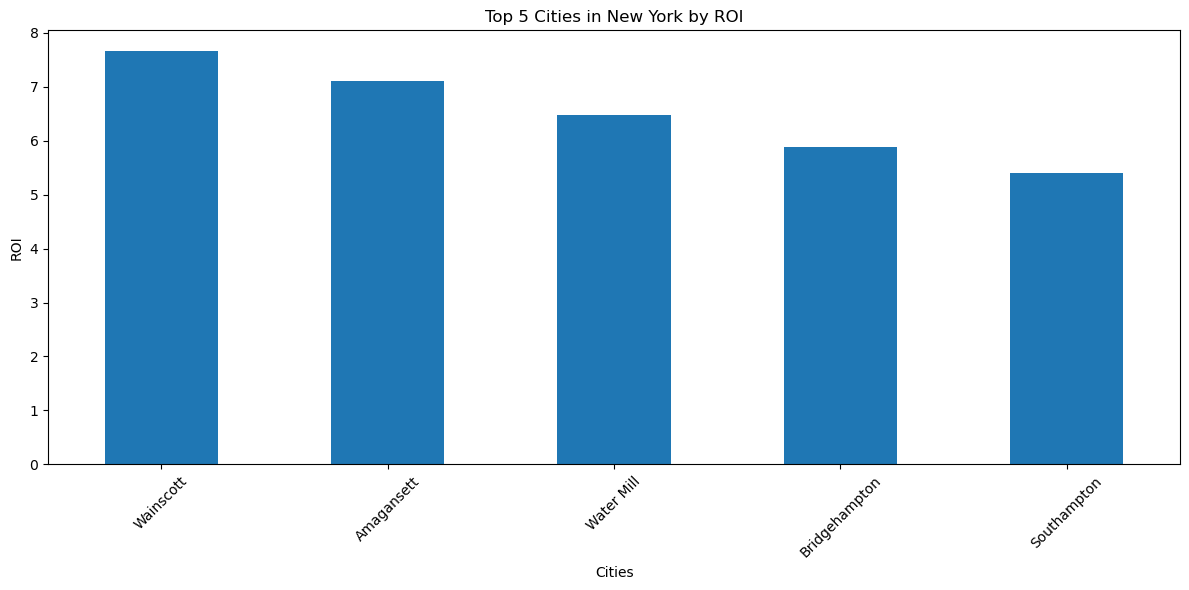

In [106]:
# Checking on top 5 cities in New York by ROI

plt.figure(figsize=(12, 6))
top_cities = ny_df.groupby('City')['ROI'].mean().nlargest(5)
top_cities.plot(kind='bar')
plt.title("Top 5 Cities in New York by ROI")
plt.xlabel("Cities")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the plot above, we also recommend investment in the best city in the state of New York, Waiscott, since it has the best Return On Investment.

## State 5: Texas

In [107]:
tx_df = melted_df[melted_df['State'] == 'Texas']
tx_df

,ZipCode,RegionID,SizeRank,City,State,Metro,CountyName,ROI,CV,time,value,month,year
1,77449,91940,9,Katy,Texas,Houston,Harris,0.748428,0.130792,1996-04-01,95400.0,April,1996
11,78660,92593,19,Pflugerville,Texas,Austin,Travis,0.663067,0.122216,1996-04-01,138900.0,April,1996
15,77573,92036,23,League City,Texas,Houston,Galveston,0.741160,0.144411,1996-04-01,141400.0,April,1996
16,77584,92045,24,Pearland,Texas,Houston,Brazoria,0.781227,0.128788,1996-04-01,138500.0,April,1996
18,79912,93123,26,El Paso,Texas,El Paso,El Paso,0.506266,0.170242,1996-04-01,119700.0,April,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899389,76941,91640,14373,Mertzon,Texas,San Angelo,Irion,0.404624,0.088958,2018-04-01,121600.0,April,2018
3899489,79313,92897,14473,Anton,Texas,Levelland,Hockley,-0.167197,0.100928,2018-04-01,63300.0,April,2018
3899509,79355,92921,14493,Plains,Texas,missing,Yoakum,0.530864,0.125022,2018-04-01,93500.0,April,2018
3899616,79366,92929,14600,Ransom Canyon,Texas,Lubbock,Lubbock,0.838662,0.157537,2018-04-01,257500.0,April,2018


In [108]:
new_tx_df = tx_df.groupby('time')['value'].mean()

new_tx_df = pd.DataFrame(new_tx_df)
new_tx_df

,value
time,
1996-04-01,108275.228426
1996-05-01,108293.299492
1996-06-01,108335.939086
1996-07-01,108405.685279
1996-08-01,108498.578680
...,...
2017-12-01,193613.197970
2018-01-01,194270.558376
2018-02-01,195356.954315


In [109]:
# Drop duplicates and calculate mean for each unique date
new_tx_df = new_tx_df.groupby('time').mean()
new_tx_df.head(40)

,value
time,
1996-04-01,108275.228426
1996-05-01,108293.299492
1996-06-01,108335.939086
1996-07-01,108405.685279
1996-08-01,108498.578680
1996-09-01,108606.903553
1996-10-01,108730.050761
1996-11-01,108858.477157
1996-12-01,108994.619289


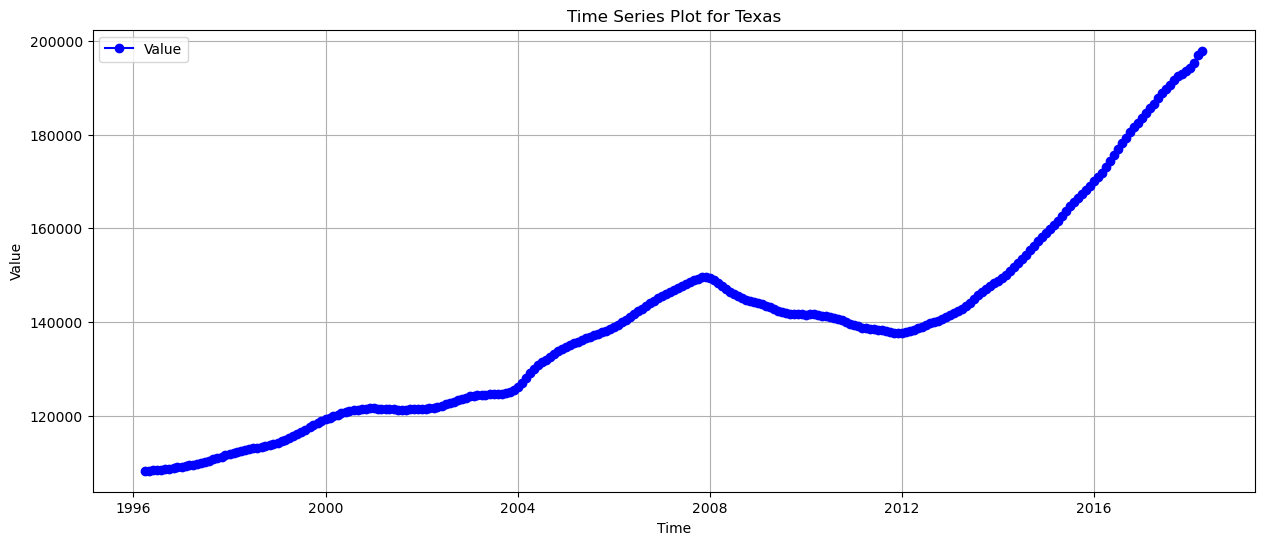

In [110]:
# Plotting the 'value' column
plt.figure(figsize=(15, 6))
plt.plot(new_tx_df['value'], marker='o', linestyle='-', color='b', label='Value')
plt.title('Time Series Plot for Texas')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [111]:
# Split the time series into train and test sets
tx_train_set, tx_test_set = split_train_test(new_tx_df)

# Print the sizes of the train and test sets
print("Train set size:", len(tx_train_set))
print("Test set size:", len(tx_test_set))

Train set size: 185
Test set size: 80


In [112]:
# Detrend the series by differencing

new_tx_df_detrended = tx_train_set.diff().dropna()
new_tx_df_detrended

,value
time,
1996-05-01,18.071066
1996-06-01,42.639594
1996-07-01,69.746193
1996-08-01,92.893401
1996-09-01,108.324873
...,...
2011-04-01,-171.776650
2011-05-01,-69.949239
2011-06-01,-65.685279


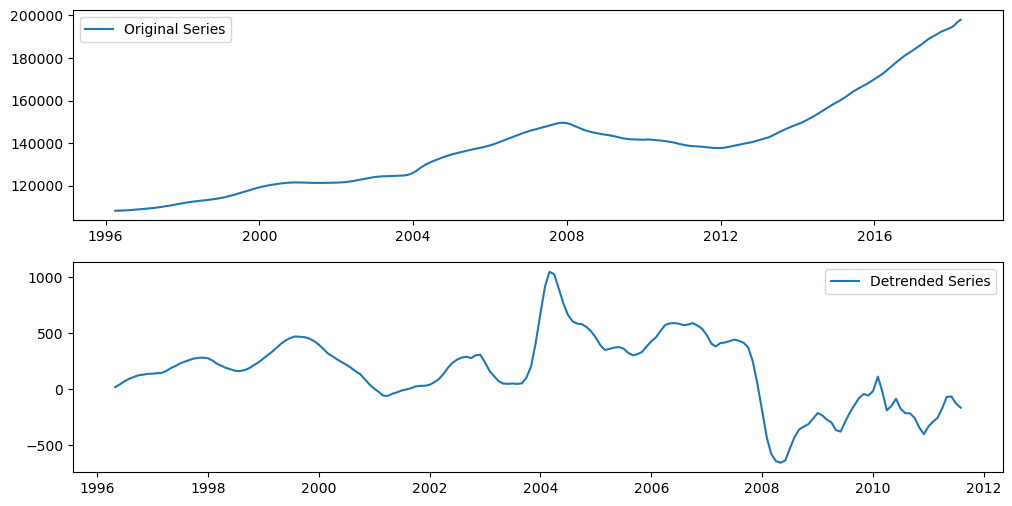

In [113]:
# Plot the original and detrended series
plt.figure(figsize=(12, 6))
plt.subplot(211)

plt.plot(new_tx_df, label='Original Series')
#plt.plot(rolling_mean, label='Rolling Mean', color='red')
plt.legend(loc='best')
plt.subplot(212)
plt.plot(new_tx_df_detrended, label='Detrended Series')
plt.legend(loc='best')
plt.show()

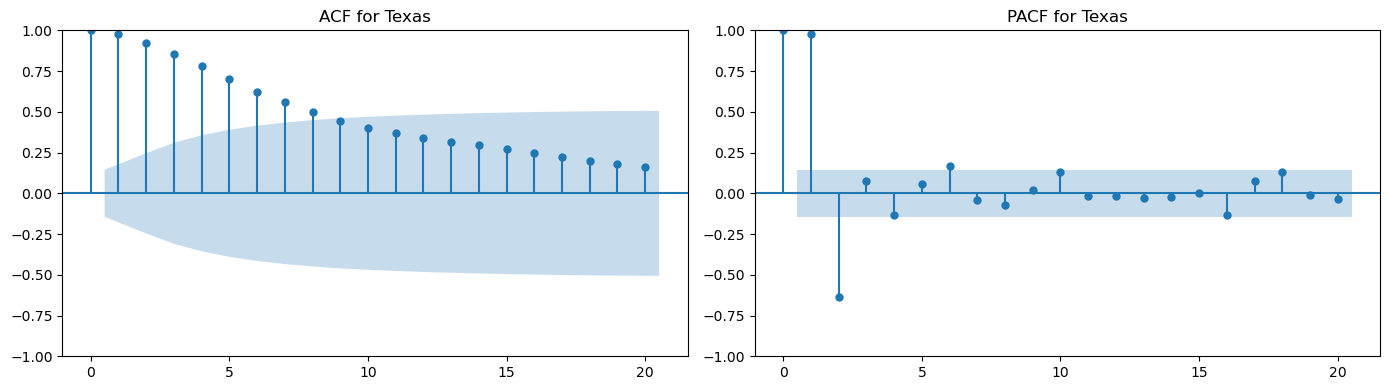

In [114]:
label = 'Texas'
max_lags_acf = min(20, len(new_tx_df_detrended)-1)  # Adjust lags for ACF based on data length
max_lags_pacf = min(max_lags_acf, len(new_tx_df_detrended)//2 - 1)  # Adjust lags for PACF
fig, ax = plt.subplots(1, 2, figsize=(14, 4))
# Plot ACF
plot_acf(new_tx_df_detrended, ax=ax[0], lags=max_lags_acf)
ax[0].set_title(f'ACF for {label}')
# Plot PACF
if max_lags_pacf > 0:  # Ensure we have at least one lag for PACF
    plot_pacf(new_tx_df_detrended, ax=ax[1], lags=max_lags_pacf)
    ax[1].set_title(f'PACF for {label}')
else:
    ax[1].set_title(f'PACF for {label} (Not enough data for PACF)')
plt.tight_layout()
plt.show()

ADF Statistic: -1.8487025536912076
p-value: 0.3565640875432275


/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was p

p: 0, AIC: 2039.5859982316017
p: 1, AIC: 1891.7188788048625
p: 2, AIC: 1866.6600928205994
p: 3, AIC: 1855.701391565248
p: 4, AIC: 1814.636934692019
Best p based on AIC: 4
                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                  184
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -902.318
Date:                Sun, 28 Jul 2024   AIC                           1814.637
Time:                        23:09:45   BIC                           1830.684
Sample:                    05-01-1996   HQIC                          1821.142
                         - 08-01-2011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2409      0.041     30

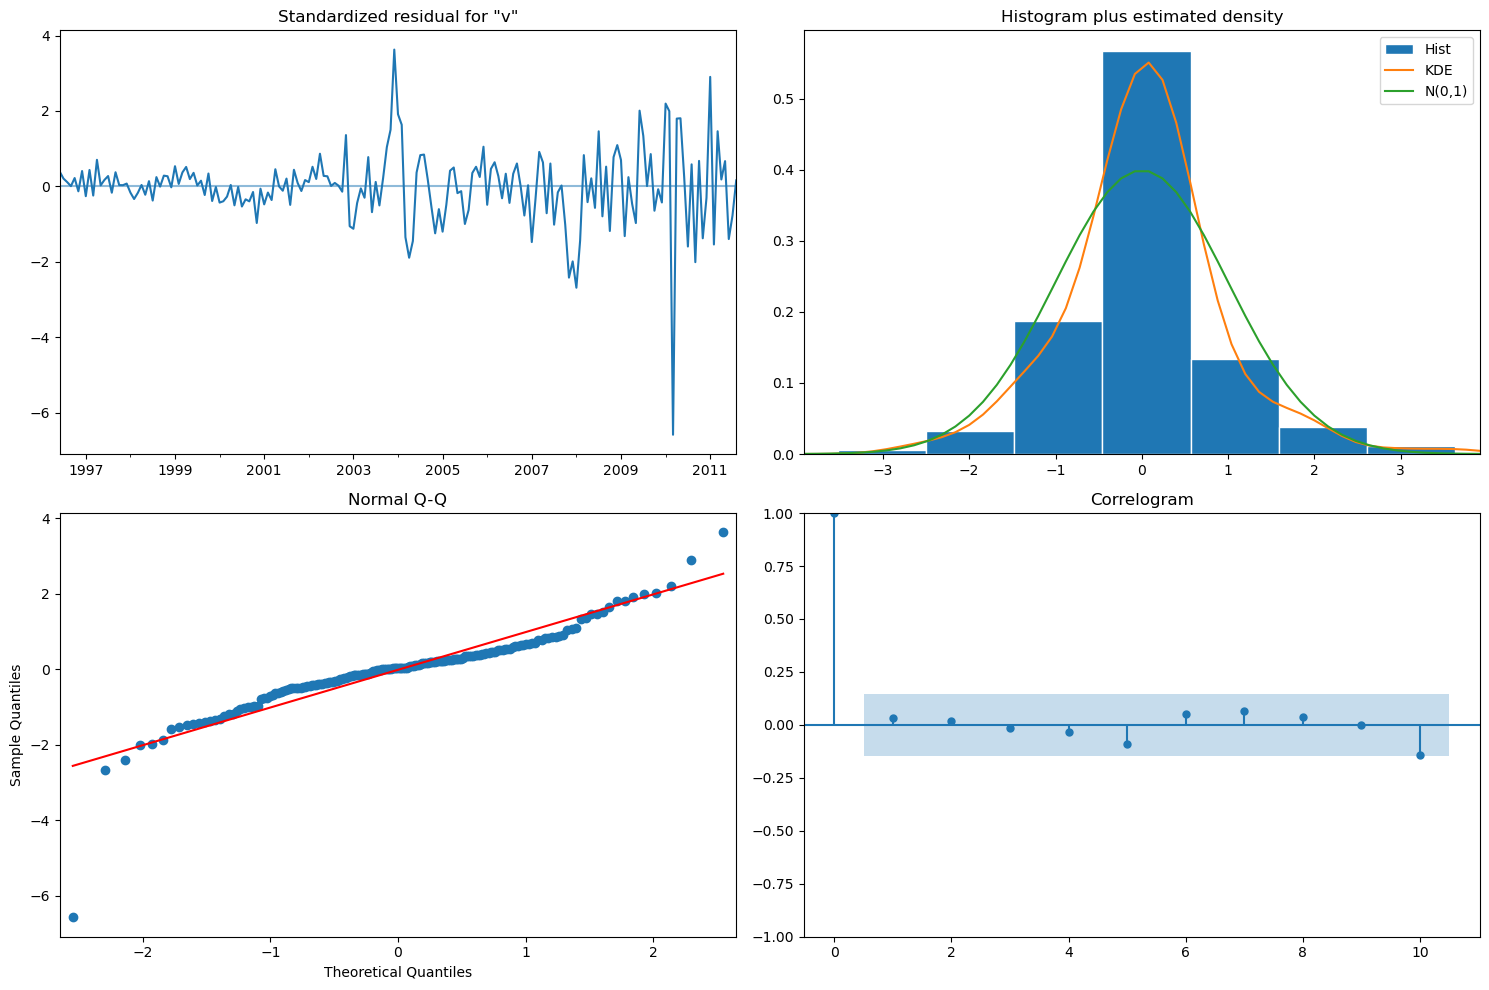

In [115]:
# Assume new_tx_df_detrended is your detrended time series

# Determine d using ADF test
result = adfuller(new_tx_df_detrended)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Assuming d = 1 based on differencing once
d = 1

# Fit ARIMA models with different p values and compare AIC
aic_values = []
p_values = range(0, 5)  # Trying p values from 0 to 4

for p in p_values:
    model = ARIMA(new_tx_df_detrended, order=(p, d, 0)).fit()
    aic_values.append((p, model.aic))

# Print AIC values for different p
for p, aic in aic_values:
    print(f'p: {p}, AIC: {aic}')

# Select the best p based on AIC
best_p = sorted(aic_values, key=lambda x: x[1])[0][0]
print(f'Best p based on AIC: {best_p}')

# Fit the best ARIMA model
best_model = ARIMA(new_tx_df_detrended, order=(best_p, d, 0)).fit()

# Print model summary
print(best_model.summary())

# Plot diagnostics of the best model
best_model.plot_diagnostics(figsize=(15, 10))
plt.tight_layout()
plt.show()

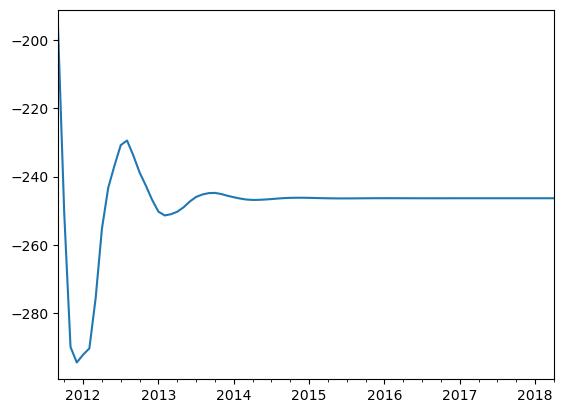

In [116]:
# Evaluating the model and making forecasts
new_tx_df_detrended_forecast = model.forecast(steps=80)

# Printing the forecasted values

new_tx_df_detrended_forecast.plot();

In [117]:
#print(len(SB_test_set), len(new_SB_df_detrended_forecast))

# Align lengths if they are different
#SB_test_set = SB_test_set[:len(new_SB_df_detrended_forecast)]

# Compute Mean Squared Error (MSE)
mse = mean_squared_error(tx_test_set, new_tx_df_detrended_forecast)

# Compute Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print RMSE
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 163026.9277118522


In [118]:
order = (3, 1, 0)  # (p, d, q)
seasonal_order = (3, 1, 0, 12)  # (P, D, Q, S)

sarima_model = SARIMAX(tx_train_set['value'], order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.89354D+00    |proj g|=  2.52023D+00

At iterate    5    f=  6.01126D+00    |proj g|=  1.43115D-01

At iterate   10    f=  5.87549D+00    |proj g|=  1.26516D-02

At iterate   15    f=  5.87332D+00    |proj g|=  4.78218D-02

At iterate   20    f=  5.79516D+00    |proj g|=  6.90749D-02

At iterate   25    f=  5.78896D+00    |proj g|=  1.52526D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     30      1     0     0   

In [119]:
# Forecast
sarima_forecast = sarima_result.get_forecast(steps=len(tx_test_set))
forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE (Root Mean Squared Error) or other metrics
rmse = np.sqrt(mean_squared_error(tx_test_set['value'], forecast_mean))
print(f"RMSE: {rmse}")

RMSE: 38743.66997226575


ADF Statistic: -1.8487025536912076
p-value: 0.3565640875432275
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.03694D+00    |proj g|=  1.65298D-01

At iterate    5    f=  4.99891D+00    |proj g|=  4.72927D-03

At iterate   10    f=  4.98986D+00    |proj g|=  1.50018D-02

At iterate   15    f=  4.98918D+00    |proj g|=  1.11846D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   1.118D-05   4.989D+00
  F =   4.9891780183991923     

CONVER

/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/home/nyaribo/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
 This problem is unconstrained.


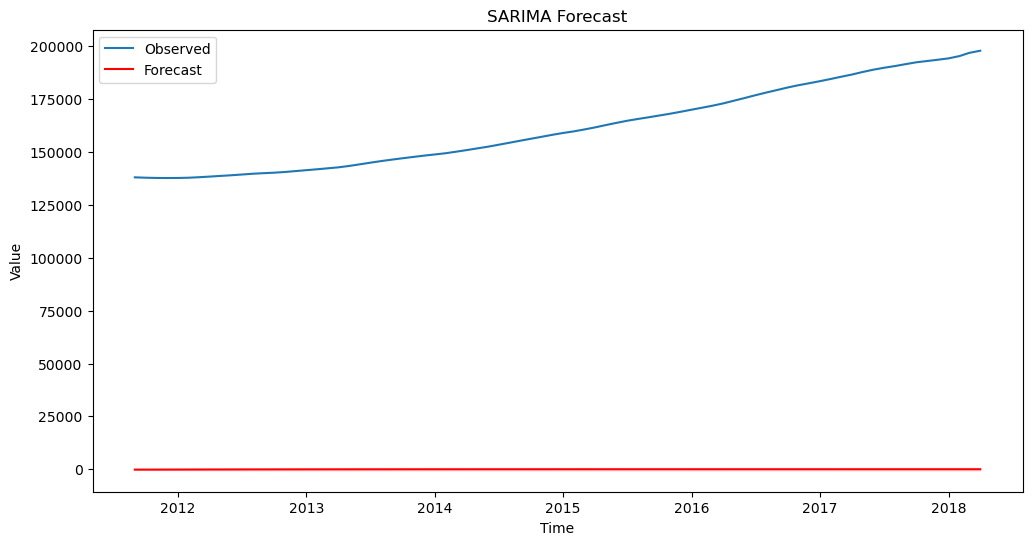

In [120]:
# Detrending and preparing your time series data

# Determine d using ADF test
result = adfuller(new_tx_df_detrended)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Fit SARIMA model
order = (2, 0, 1) # p, d, q
seasonal_order = (0, 0, 0, 12) # p, d, q, s

sarima_model = SARIMAX(new_tx_df_detrended, order=order, seasonal_order=seasonal_order)
sarima_result = sarima_model.fit()

# Print model summary
print(sarima_result.summary())

# Forecast future values
sarima_forecast = sarima_result.get_forecast(steps=len(tx_test_set))
forecast_mean = sarima_forecast.predicted_mean

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(tx_test_set['value'], forecast_mean))
print(f"RMSE: {rmse}")


# Plotting forecast
plt.figure(figsize=(12, 6))
plt.plot(tx_test_set.index, tx_test_set['value'], label='Observed')
plt.plot(tx_test_set.index, forecast_mean, label='Forecast', color='red')
plt.fill_between(tx_test_set.index,
                 sarima_forecast.conf_int()['lower value'],
                 sarima_forecast.conf_int()['upper value'], color='pink', alpha=0.3)
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

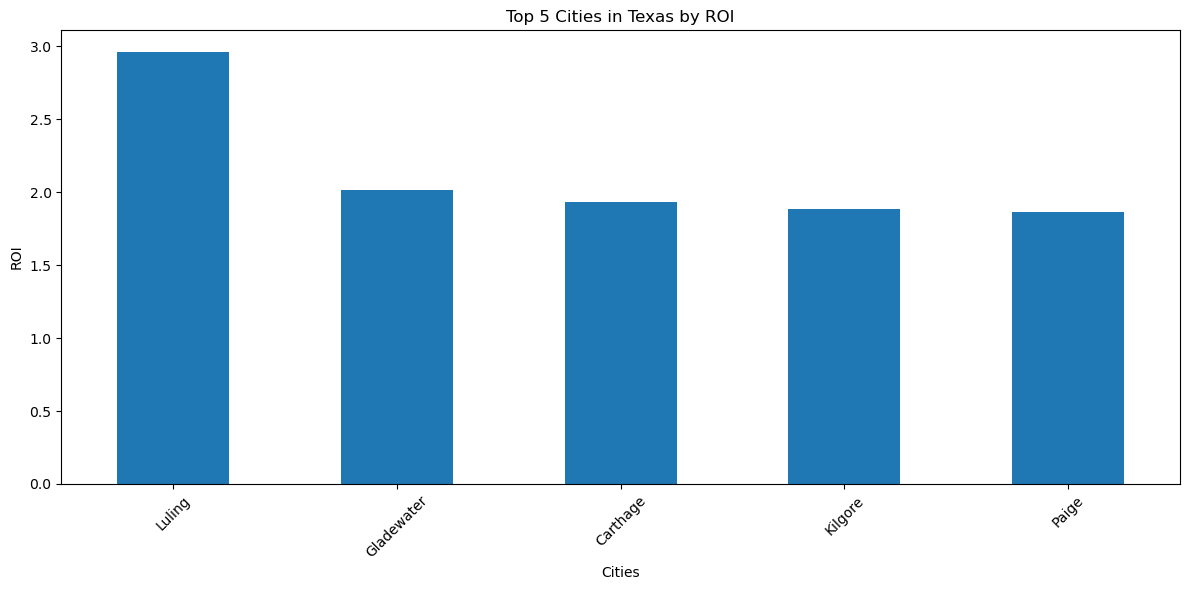

In [121]:
# Checking on top 5 cities in Texas by ROI

plt.figure(figsize=(12, 6))
top_cities = tx_df.groupby('City')['ROI'].mean().nlargest(5)
top_cities.plot(kind='bar')
plt.title("Top 5 Cities in Texas by ROI")
plt.xlabel("Cities")
plt.ylabel("ROI")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the plot above, we also recommend investment in the best city in the state of Texas, Luling, since it has the best Return On Investment.

### CONCLUSION
Based on the evaluation metrics (MSE and RMSE), the SARIMA outperformed other models with the lowest RMSE. This model was selected as the final model for predicting best zip codes to invest in.The following are the results of the metrics used during he modeling:

Base Model: Serves as a baseline, expected to have higher MSE and RMSE compared to ARIMA and SARIMA.
ARIMA Model: Expected to perform better than the base model by capturing non-seasonal patterns.
SARIMA Model: Expected to perform the best if there is seasonality in the data, by capturing both non-seasonal and seasonal patterns.
The top 5 best zip codes to invest in:

* California, Stinson Beach
* New York, Wainscott
* Texas, Luling
* Pennsylvania, Porter
* Florida, Rotonda West

### Future Work

In future, we could extend our research to explore other cities and enhance our model by gaining a deeper insight into the data and trends. This would involve continuously refining and optimizing our predictive model.

With additional time, which is a resource-intensive commitment, we could analyze return data for each ZIP code individually. This approach would allow us to select ZIP codes based on predicted returns and minimized losses, rather than relying solely on historical data.

Moreover, we could explore alternative time series forecasting methods to evaluate their effectiveness.

Lastly, incorporating more up-to-date data would ensure that our predictions are more accurate and reflective of the current real estate landscape.



